In [1]:
1729

1729

## This notebook is continuation of Omdena 12 April - Data Cleaning
- references
- https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf
- https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial
- https://app.cpcbccr.com/ccr_docs/FINAL-REPORT_AQI_.pdf
- Sub index is calculated by tables in https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/ & also formula is in aqi-technical-assistance-document-sept2018.pdf 
     - I = ( IHi − ILo /  BPhi −BPlo ) (C − BPlo )+ ILo

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 

from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv('temp_so2_checkpoint_filled_so2.csv')
df


/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/4285683945.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('temp_so2_checkpoint_filled_so2.csv')


,Unnamed: 0,index,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,...,Benzene,TOT-RF,PM10,AQI,AQI_Bucket,Day,Month,Year,Week,Hour
0,0,53641,2020-03-04 00:00:00,NISE,88.67,17.92,31.11,49.03,9.906667,2.55,...,NaN,0.0,184.54,NaN,NaN,4,3,2020,10,0
1,1,53642,2020-03-04 01:00:00,NISE,82.42,16.90,29.54,46.43,8.286667,2.42,...,NaN,0.0,178.92,NaN,NaN,4,3,2020,10,1
2,2,53643,2020-03-04 02:00:00,NISE,82.35,17.71,29.56,47.33,8.940000,2.40,...,NaN,0.0,187.56,NaN,NaN,4,3,2020,10,2
3,3,53644,2020-03-04 03:00:00,NISE,102.34,18.05,27.90,45.92,9.916667,2.36,...,NaN,0.0,211.59,NaN,NaN,4,3,2020,10,3
4,4,53645,2020-03-04 04:00:00,NISE,97.36,15.49,23.88,39.35,9.733333,2.24,...,NaN,0.0,181.50,NaN,NaN,4,3,2020,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,147526,26811,2023-03-26 03:00:00,Vikas Sadan,83.22,23.90,49.59,70.03,41.300000,0.87,...,4.57,0.0,NaN,NaN,NaN,26,3,2023,12,3
147527,147527,26812,2023-03-26 04:00:00,Vikas Sadan,71.96,24.25,53.15,71.91,40.560000,0.66,...,8.22,0.0,NaN,NaN,NaN,26,3,2023,12,4
147528,147528,26813,2023-03-26 05:00:00,Vikas Sadan,75.47,24.55,54.38,64.34,40.820000,0.28,...,8.21,0.0,NaN,NaN,NaN,26,3,2023,12,5
147529,147529,26814,2023-03-26 06:00:00,Vikas Sadan,69.07,23.09,54.48,72.73,39.290000,0.43,...,8.15,0.0,NaN,NaN,NaN,26,3,2023,12,6


In [7]:
df.isna().sum()
df.columns

Unnamed: 0         0
index              0
Datetime           0
Station            0
PM2.5              0
NO                 0
NO2                0
NOx                0
SO2                0
CO                 0
Ozone          49599
Benzene        55514
TOT-RF         40258
PM10           56362
AQI           114111
AQI_Bucket    114111
Day                0
Month              0
Year               0
Week               0
Hour               0
dtype: int64

Index(['Unnamed: 0', 'index', 'Datetime', 'Station', 'PM2.5', 'NO', 'NO2',
       'NOx', 'SO2', 'CO', 'Ozone', 'Benzene', 'TOT-RF', 'PM10', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0', 'index','Ozone', 'Benzene', 'TOT-RF','PM10'], axis = 'columns', inplace = True)

In [13]:
# Just checking if NISE SO2 is filled as avg of other 3 stations
df[df['Station']!='No Station'] .sort_values(['Datetime','Station'])[:30]

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour
0,2020-03-04 00:00:00,NISE,88.67,17.92,31.11,49.03,9.906667,2.55,NaN,NaN,4,3,2020,10,0
67074,2020-03-04 00:00:00,Sector 51,61.64,5.99,10.58,12.37,15.710000,1.11,NaN,NaN,4,3,2020,10,0
93899,2020-03-04 00:00:00,Teri Gram,95.00,2.47,26.39,14.17,3.510000,0.35,NaN,NaN,4,3,2020,10,0
120715,2020-03-04 00:00:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.500000,3.01,NaN,NaN,4,3,2020,10,0
1,2020-03-04 01:00:00,NISE,82.42,16.90,29.54,46.43,8.286667,2.42,NaN,NaN,4,3,2020,10,1
67075,2020-03-04 01:00:00,Sector 51,61.64,5.99,10.58,12.37,15.710000,1.11,NaN,NaN,4,3,2020,10,1
93900,2020-03-04 01:00:00,Teri Gram,95.00,2.47,26.39,14.17,3.510000,0.35,NaN,NaN,4,3,2020,10,1
120716,2020-03-04 01:00:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.640000,5.38,NaN,NaN,4,3,2020,10,1
2,2020-03-04 02:00:00,NISE,82.35,17.71,29.56,47.33,8.940000,2.40,NaN,NaN,4,3,2020,10,2
67076,2020-03-04 02:00:00,Sector 51,61.64,5.99,10.58,12.37,15.710000,1.11,NaN,NaN,4,3,2020,10,2


In [14]:
df.isna().sum()

Datetime           0
Station            0
PM2.5              0
NO                 0
NO2                0
NOx                0
SO2                0
CO                 0
AQI           114111
AQI_Bucket    114111
Day                0
Month              0
Year               0
Week               0
Hour               0
dtype: int64

# Calculating AQI
- First calculate AQI and cross-check it with the existing AQI
- If it matches, continue the same formula for other missing rows of AQI and impute them


In [17]:
df[~df['AQI'].isna()].sort_values(['Datetime'])

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour
28180,2016-01-23 11:00:00,No Station,77.74,14.13,11.83,15.50,11.42,0.58,232.0,Poor,23,1,2016,3,11
28181,2016-01-23 12:00:00,No Station,69.80,17.84,13.91,16.90,10.00,0.38,226.0,Poor,23,1,2016,3,12
28182,2016-01-23 13:00:00,No Station,55.86,20.73,7.14,15.01,8.00,0.25,218.0,Poor,23,1,2016,3,13
28183,2016-01-23 14:00:00,No Station,55.55,15.63,12.43,16.00,7.63,0.23,211.0,Poor,23,1,2016,3,14
28184,2016-01-23 15:00:00,No Station,52.54,23.19,6.08,16.91,7.46,0.17,204.0,Poor,23,1,2016,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67069,2020-06-30 20:00:00,No Station,54.74,6.23,10.67,12.60,4.18,0.60,154.0,Moderate,30,6,2020,27,20
67070,2020-06-30 21:00:00,No Station,54.37,6.30,10.28,11.88,4.03,1.20,154.0,Moderate,30,6,2020,27,21
67071,2020-06-30 22:00:00,No Station,50.34,6.93,10.36,13.01,6.17,1.00,155.0,Moderate,30,6,2020,27,22
67072,2020-06-30 23:00:00,No Station,53.23,6.64,10.30,12.75,6.31,0.86,156.0,Moderate,30,6,2020,27,23


### Formula
- https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial

In [19]:
df[~df['AQI'].isna()].groupby(['Year','Month','Day','Station']).mean()

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/1612949280.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[~df['AQI'].isna()].groupby(['Year','Month','Day','Station']).mean()


PM2.5         NO        NO2        NOx  \
Year Month Day Station                                                   
2016 1     23  No Station   82.082308  15.240000   7.826154  14.072308   
           24  No Station   79.345000  19.641250   5.306875  14.419375   
           26  No Station  142.079375  17.776250   9.438125  16.273750   
     2     3   No Station   58.620556  18.982778  15.398889  15.408333   
           4   No Station   52.907083  17.020417   9.587917  14.429167   
...                               ...        ...        ...        ...   
2020 6     27  No Station   47.817917   3.120000   8.046250   7.240833   
           28  No Station   64.715417   5.617500   9.651667   8.972083   
           29  No Station   46.887083   4.004167   8.973750   9.646667   
           30  No Station   47.271250   6.285417  10.377917  12.082083   
     7     1   No Station   61.640000   5.990000  10.580000  12.370000   

                                 SO2        CO         AQI  Week  Hour  
Year Month Day Station                                                  
2016 1     23  No Station   8.718462  0.130000  202.000000   3.0  17.0  
           24  No Station   8.433750  1.400625  209.187500   3.0   7.5  
           26  No Station  10.336875  0.687500  256.687500   4.0  12.5  
     2     3   No Station   5.385000  0.010000   90.055556   5.0  14.5  
           4   No Station   7.786667  1.430000   95.416667   5.0  11.5  
...                              ...       ...         ...   ...   ...  
2020 6     27  No Station   9.178750  0.662083  120.791667  26.0  11.5  
           28  No Station   7.815000  0.671250  153.125000  26.0  11.5  
           29  No Station   7.865000  0.568750  139.541667  27.0  11.5  
           30  No Station   7.361250  0.783750  130.541667  27.0  11.5  
     7     1   No Station   7.570000  1.110000  157.000000  27.0   0.0  

[1453 rows x 9 columns]

### Check AQI for 2016-01-24

In [34]:
df[df['Datetime'].dt.strftime('%Y-%m-%d') == '2016-01-24']

AttributeError: Can only use .dt accessor with datetimelike values

In [35]:
df['Datetime'].dtype

dtype('O')

In [38]:
# temp1 = 
df['Datetime'].apply(lambda x : datetime.strptime(x, '%d-%m-%Y %H:%M'))
# temp = compiled['Datetime'][107273:]
# temp.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# temp2 = compiled['Datetime'][107273:].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# temp3 = pd.concat([temp1, temp2])

AttributeError: module 'datetime' has no attribute 'strptime'

In [45]:
# df[df['Datetime'].dt.strftime('%Y-%m-%d') == '2016-01-24']
df[ (df['Year'] == 2016) & (df['Month'] == 1) & (df['Day'] == 24 ) ]

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour
28193,2016-01-24 00:00:00,No Station,150.92,18.08,3.79,15.61,12.02,0.01,197.0,Moderate,24,1,2016,3,0
28194,2016-01-24 01:00:00,No Station,137.71,10.61,9.53,13.72,17.78,1.58,201.0,Poor,24,1,2016,3,1
28195,2016-01-24 02:00:00,No Station,142.78,9.69,8.02,10.65,9.15,1.40,207.0,Poor,24,1,2016,3,2
28196,2016-01-24 03:00:00,No Station,134.05,14.15,9.82,14.31,11.25,1.60,212.0,Poor,24,1,2016,3,3
28197,2016-01-24 04:00:00,No Station,99.45,15.63,4.63,13.95,6.65,1.62,212.0,Poor,24,1,2016,3,4
28198,2016-01-24 05:00:00,No Station,72.78,14.68,7.03,12.98,5.07,1.42,210.0,Poor,24,1,2016,3,5
28199,2016-01-24 06:00:00,No Station,59.60,13.71,13.11,13.95,5.86,1.55,206.0,Poor,24,1,2016,3,6
28200,2016-01-24 07:00:00,No Station,52.47,24.19,3.22,15.06,6.12,1.47,201.0,Poor,24,1,2016,3,7
28201,2016-01-24 08:00:00,No Station,52.47,24.19,3.22,15.06,7.63,1.47,202.0,Poor,24,1,2016,3,8
28202,2016-01-24 09:00:00,No Station,52.47,24.19,3.22,15.06,7.63,1.47,202.0,Poor,24,1,2016,3,9


In [47]:
# AQI at 2016-01-24 14:00:00 is equal to 1 day back average values (2016-01-23 14:00:00)
# Take all the values from 2016-01-23 14:00:00 to 2016-01-24 13:00:00 and take average

In [243]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return (x - 31) * 49 / 29 + 51 
    elif x <= 90:
        return (x - 61) * 99 / 29 + 101 
    elif x <= 120:
        return (x - 91) * 99 / 29 + 201
    elif x <= 250:
        return (x - 121) * 99 / 129 + 301
    elif x > 250:
        return (x - 250) * 99 / 129 + 401
    else:
        return np.nan

# Below is EPA for USA, so no need of this.
# Refer to https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/ 
# def get_PM25_subindex(x): # Refer to aqi-technical-assistance-document-sept2018.pdf 
#     if x <= 12:
#         return x * 50 / 12
#     elif x <= 35.4:
#         return (49 / 23.3) * (x - 12.1) + 51
#     elif x <= 55.4:
#         return (49 / 19.9) * (x - 35.5) + 101
#     elif x <= 150.4:
#         return (49 / 94.9) * (x - 55.5) + 151
#     elif x <= 250.4:
#         return (99 / 99.9) * (x - 150.5) + 201
#     elif x <= 350.4:
#         return (99 / 99.9) * (x - 250.5) + 301
#     else:
#         return np.nan


# df["PM2.5_SubIndex"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))
# df

In [246]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50
    elif x <= 2:
        return (x - 1.1) * 49 / 0.9 + 51
    elif x <= 10:
        return (x - 2.1) * 99 / 7.9 + 101
    elif x <= 17:
        return (x - 10.1) * 99 / 6.9 + 201
    elif x <= 34:
        return (x - 17.1) * 99 / 16.9 + 301
    elif x > 34:
        return (x - 34) * 100 / 17 + 400
    else:
        return np.nan

# df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))

In [247]:
def get_NO2_subindex(x):
    if x <= 40:
        return x * 5 / 4
    elif x <= 80:
        return (x - 41) * 49 / 39 + 51 
    elif x <= 180:
        return (x + 20)
    elif x <= 280:
        return (x + 20)
    elif x <= 400:
        return 301 + (x - 281) * 99 / 119
    else:
        return np.nan 

In [248]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 5 / 4
    elif x <= 80:
        return 51 + (x - 41) * 49 / 39
    elif x <= 380:
        return 101 + (x - 81) * 99 / 299
    elif x <= 800:
        return 201 + (x - 381) * 99 / 419
    elif x <= 1600:
        return 301 + (x - 801) * 99 / 799
    elif x > 1600:
        return 401 + (x - 1601) * 99 / 799
    else:
        return np.nan

# df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))

In [245]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return np.nan

# df["NOx_SubIndex"] = df["NOx"].apply(lambda x: get_NOx_subindex(x))

In [249]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [54]:
# df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
#                                  "CO_SubIndex"]].max(axis = 1))

In [61]:
df[ (df['Year'] == 2016) & (df['Month'] == 1) & (df['Day'] == 24 ) ]

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,AQI_calculated
28193,2016-01-24 00:00:00,No Station,150.92,18.08,3.79,15.61,12.02,0.01,197.0,Moderate,24,1,2016,3,0,323.784615,15.0250,19.5125,0.5,324.0
28194,2016-01-24 01:00:00,No Station,137.71,10.61,9.53,13.72,17.78,1.58,201.0,Poor,24,1,2016,3,1,313.623077,22.2250,17.1500,79.0,314.0
28195,2016-01-24 02:00:00,No Station,142.78,9.69,8.02,10.65,9.15,1.40,207.0,Poor,24,1,2016,3,2,317.523077,11.4375,13.3125,70.0,318.0
28196,2016-01-24 03:00:00,No Station,134.05,14.15,9.82,14.31,11.25,1.60,212.0,Poor,24,1,2016,3,3,310.807692,14.0625,17.8875,80.0,311.0
28197,2016-01-24 04:00:00,No Station,99.45,15.63,4.63,13.95,6.65,1.62,212.0,Poor,24,1,2016,3,4,231.500000,8.3125,17.4375,81.0,232.0
28198,2016-01-24 05:00:00,No Station,72.78,14.68,7.03,12.98,5.07,1.42,210.0,Poor,24,1,2016,3,5,142.600000,6.3375,16.2250,71.0,143.0
28199,2016-01-24 06:00:00,No Station,59.60,13.71,13.11,13.95,5.86,1.55,206.0,Poor,24,1,2016,3,6,99.333333,7.3250,17.4375,77.5,99.0
28200,2016-01-24 07:00:00,No Station,52.47,24.19,3.22,15.06,6.12,1.47,201.0,Poor,24,1,2016,3,7,87.450000,7.6500,18.8250,73.5,87.0
28201,2016-01-24 08:00:00,No Station,52.47,24.19,3.22,15.06,7.63,1.47,202.0,Poor,24,1,2016,3,8,87.450000,9.5375,18.8250,73.5,87.0
28202,2016-01-24 09:00:00,No Station,52.47,24.19,3.22,15.06,7.63,1.47,202.0,Poor,24,1,2016,3,9,87.450000,9.5375,18.8250,73.5,87.0


In [81]:
df[(df['Year'] == 2016) & (df['Month'] == 1) &
   (df['Day'] == 24)]
# .groupby("Station")["PM2.5"]


,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,AQI_calculated
28193,2016-01-24 00:00:00,No Station,150.92,18.08,3.79,15.61,12.02,0.01,197.0,Moderate,24,1,2016,3,0,323.784615,15.0250,19.5125,0.5,324.0
28194,2016-01-24 01:00:00,No Station,137.71,10.61,9.53,13.72,17.78,1.58,201.0,Poor,24,1,2016,3,1,313.623077,22.2250,17.1500,79.0,314.0
28195,2016-01-24 02:00:00,No Station,142.78,9.69,8.02,10.65,9.15,1.40,207.0,Poor,24,1,2016,3,2,317.523077,11.4375,13.3125,70.0,318.0
28196,2016-01-24 03:00:00,No Station,134.05,14.15,9.82,14.31,11.25,1.60,212.0,Poor,24,1,2016,3,3,310.807692,14.0625,17.8875,80.0,311.0
28197,2016-01-24 04:00:00,No Station,99.45,15.63,4.63,13.95,6.65,1.62,212.0,Poor,24,1,2016,3,4,231.500000,8.3125,17.4375,81.0,232.0
28198,2016-01-24 05:00:00,No Station,72.78,14.68,7.03,12.98,5.07,1.42,210.0,Poor,24,1,2016,3,5,142.600000,6.3375,16.2250,71.0,143.0
28199,2016-01-24 06:00:00,No Station,59.60,13.71,13.11,13.95,5.86,1.55,206.0,Poor,24,1,2016,3,6,99.333333,7.3250,17.4375,77.5,99.0
28200,2016-01-24 07:00:00,No Station,52.47,24.19,3.22,15.06,6.12,1.47,201.0,Poor,24,1,2016,3,7,87.450000,7.6500,18.8250,73.5,87.0
28201,2016-01-24 08:00:00,No Station,52.47,24.19,3.22,15.06,7.63,1.47,202.0,Poor,24,1,2016,3,8,87.450000,9.5375,18.8250,73.5,87.0
28202,2016-01-24 09:00:00,No Station,52.47,24.19,3.22,15.06,7.63,1.47,202.0,Poor,24,1,2016,3,9,87.450000,9.5375,18.8250,73.5,87.0


In [82]:
# 24 hour average for PM2.5

df[(df['Year'] == 2016) & (df['Month'] == 1) &
   (df['Day'] == 24)].groupby("Station")["PM2.5"].rolling(
       window=24, min_periods=16).mean()

Station          
No Station  28193          NaN
            28194          NaN
            28195          NaN
            28196          NaN
            28197          NaN
            28198          NaN
            28199          NaN
            28200          NaN
            28201          NaN
            28202          NaN
            28203          NaN
            28204          NaN
            28205          NaN
            28206          NaN
            28207          NaN
            28208    79.345000
            28209    77.764118
            28210    76.358889
            28211    75.101579
            28212    73.970000
            28213    72.946190
            28214    72.015455
            28215    71.165652
            28216    70.386667
Name: PM2.5, dtype: float64

In [98]:

df.Datetime = pd.to_datetime(df.Datetime)

# Gas_432.RecTime = pd.to_datetime(Gas_432.RecTime)

# Gas_432.set_index('RecTime').rolling('15T').mean()

0        2020-03-04 00:00:00
1        2020-03-04 01:00:00
2        2020-03-04 02:00:00
3        2020-03-04 03:00:00
4        2020-03-04 04:00:00
                 ...        
147526   2023-03-26 03:00:00
147527   2023-03-26 04:00:00
147528   2023-03-26 05:00:00
147529   2023-03-26 06:00:00
147530   2023-03-26 07:00:00
Name: Datetime, Length: 147531, dtype: datetime64[ns]

In [96]:
# Average 24 hour value

df.groupby(['Year','Month','Day','Station']).mean()

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/2849961215.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Year','Month','Day','Station']).mean()


PM2.5         NO        NO2         NOx  \
Year Month Day Station                                                    
2015 11    27  No Station   71.080000   5.682222   8.368889    9.571111   
           28  No Station   71.080000   4.713333   8.000000    9.738750   
           29  No Station   71.080000   3.103333   8.044167    8.692500   
           30  No Station   71.080000   3.897083   8.207500    9.536667   
     12    1   No Station   71.080000   3.355000   8.133333    8.856667   
...                               ...        ...        ...         ...   
2023 3     25  Vikas Sadan  43.661250  24.847500  40.734583   55.718333   
           26  NISE         69.751250  44.481250  80.547500  125.022500   
               Sector 51    94.753529  37.387647  28.529412   42.948235   
               Teri Gram    87.997500  14.175000   6.422500   14.720000   
               Vikas Sadan  75.756250  24.286250  53.305000   69.362500   

                                  SO2        CO  AQI  Week  Hour  \
Year Month Day Station                                             
2015 11    27  No Station   15.078889  2.876667  NaN  48.0  19.0   
           28  No Station    5.775417  0.272500  NaN  48.0  11.5   
           29  No Station    5.260417  1.608333  NaN  48.0  11.5   
           30  No Station    7.507917  1.450417  NaN  49.0  11.5   
     12    1   No Station    3.718750  1.450000  NaN  49.0  11.5   
...                               ...       ...  ...   ...   ...   
2023 3     25  Vikas Sadan  39.795000  0.766667  NaN  12.0  11.5   
           26  NISE         19.664583  1.115000  NaN  12.0   3.5   
               Sector 51     5.847647  1.003529  NaN  12.0   8.0   
               Teri Gram    16.740000  0.740000  NaN  12.0   3.5   
               Vikas Sadan  39.986250  0.578750  NaN  12.0   3.5   

                            PM2.5_SubIndex  SO2_SubIndex  NOx_SubIndex  \
Year Month Day Station                                                   
2015 11    27  No Station       136.933333     18.848611     11.963889   
           28  No Station       136.933333      7.219271     12.173438   
           29  No Station       136.933333      6.575521     10.865625   
           30  No Station       136.933333      9.384896     11.920833   
     12    1   No Station       136.933333      4.648438     11.070833   
...                                    ...           ...           ...   
2023 3     25  Vikas Sadan       73.927778     49.743750     69.647917   
           26  NISE             133.160417     24.580729    144.452500   
               Sector 51        193.213876      7.309559     53.685294   
               Teri Gram        193.325000     20.925000     18.400000   
               Vikas Sadan      152.520833     49.982812     86.703125   

                            CO_SubIndex  AQI_calculated  
Year Month Day Station                                   
2015 11    27  No Station     99.416667      137.000000  
           28  No Station     13.625000      137.000000  
           29  No Station     76.213542      137.000000  
           30  No Station     68.364583      137.000000  
     12    1   No Station     72.031250      137.000000  
...                                 ...             ...  
2023 3     25  Vikas Sadan    33.520833       82.583333  
           26  NISE           55.750000      157.875000  
               Sector 51      50.176471      193.176471  
               Teri Gram      37.000000      193.375000  
               Vikas Sadan    28.937500      152.500000  

[6151 rows x 14 columns]

In [101]:
df[df['Station'] == "NISE" ].groupby(['Year','Month','Day','Station']).mean()[:20]

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/192680532.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Station'] == "NISE" ].groupby(['Year','Month','Day','Station']).mean()[:20]


PM2.5         NO        NO2        NOx        SO2  \
Year Month Day Station                                                          
2020 3     4   NISE     73.831667  12.125417  19.331250  31.457917   8.114306   
           5   NISE     29.757917   7.796667  14.869167  22.667083   8.491250   
           6   NISE     18.558750   7.445000  12.165833  19.610833  12.204167   
           7   NISE     36.292500   7.437500  11.329167  18.767083  16.203750   
           8   NISE     52.973333   8.636667  16.461250  25.104583  17.539167   
           9   NISE     45.577083   7.247500  14.132917  21.381667  15.000972   
           10  NISE     71.056667   7.440000  14.660833  22.101667  15.795972   
           11  NISE     52.997917   7.184583  10.764167  17.949583  13.306528   
           12  NISE     48.514167   7.782917  14.597917  22.382083  12.292778   
           13  NISE     49.236667   8.077500  15.609167  23.685833  12.275278   
           14  NISE     44.414167   7.738333  13.472917  21.211250  14.030278   
           15  NISE     54.736250  11.930417  18.209583  30.139583  16.007083   
           16  NISE     58.085000   8.498750  18.902083  27.580417  15.520000   
           17  NISE     62.825417   7.821667  19.802917  27.624583  19.118056   
           18  NISE     73.865833  11.229167  26.272917  37.499583  19.020000   
           19  NISE     79.975417  11.278750  23.771667  35.049167  18.243472   
           20  NISE     85.889583   8.433333  17.928750  26.361667  14.851528   
           21  NISE     54.396250   8.139583  15.693750  23.835000  16.413472   
           22  NISE     84.373750  10.138333  17.561250  27.700833  16.953889   
           23  NISE     55.051667   7.603750  11.993750  19.597500  16.765694   

                              CO  AQI  Week  Hour  PM2.5_SubIndex  \
Year Month Day Station                                              
2020 3     4   NISE     2.026667  NaN  10.0  11.5      160.842361   
           5   NISE     1.792083  NaN  10.0  11.5       49.596528   
           6   NISE     1.615000  NaN  10.0  11.5       30.931250   
           7   NISE     1.613333  NaN  10.0  11.5       65.565972   
           8   NISE     1.619167  NaN  10.0  11.5      108.649306   
           9   NISE     1.205833  NaN  11.0  11.5       85.405556   
           10  NISE     1.391250  NaN  11.0  11.5      145.183547   
           11  NISE     1.422500  NaN  11.0  11.5       88.910417   
           12  NISE     1.500833  NaN  11.0  11.5       89.214583   
           13  NISE     1.431250  NaN  11.0  11.5       88.595833   
           14  NISE     1.464583  NaN  11.0  11.5       77.810417   
           15  NISE     1.345417  NaN  11.0  11.5      102.933333   
           16  NISE     1.197083  NaN  12.0  11.5      105.555556   
           17  NISE     1.173750  NaN  12.0  11.5      123.441774   
           18  NISE     1.344167  NaN  12.0  11.5      154.067361   
           19  NISE     1.538750  NaN  12.0  11.5      167.208761   
           20  NISE     1.395833  NaN  12.0  11.5      186.145887   
           21  NISE     1.147500  NaN  12.0  11.5      101.456250   
           22  NISE     1.252083  NaN  12.0  11.5      182.964583   
           23  NISE     1.042083  NaN  13.0  11.5      105.669444   

                        SO2_SubIndex  NOx_SubIndex  CO_SubIndex  \
Year Month Day Station                                            
2020 3     4   NISE        10.142882     39.322396    96.427083   
           5   NISE        10.614063     28.333854    89.541667   
           6   NISE        15.255208     24.513542    80.750000   
           7   NISE        20.254687     23.458854    80.666667   
           8   NISE        21.923958     31.380729    80.848958   
           9   NISE        18.751215     26.727083    60.291667   
           10  NISE        19.744965     27.627083    69.562500   
           11  NISE        16.633160     22.436979    71.125000   
           12  NISE        15.365972     27.977604    75

In [189]:
df["PM2.5_24_avg"] = df.groupby("Station")["PM2.5"].rolling(window = 24).mean().values
df

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,CO,CO_8_avg,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated
0,2020-03-04 00:00:00,NISE,88.67,NaN,17.92,31.11,49.03,61.2875,9.906667,12.383333,2.55,NaN,NaN,NaN,4,3,2020,10,0,196.0
1,2020-03-04 01:00:00,NISE,82.42,NaN,16.90,29.54,46.43,58.0375,8.286667,10.358333,2.42,NaN,NaN,NaN,4,3,2020,10,1,175.0
2,2020-03-04 02:00:00,NISE,82.35,NaN,17.71,29.56,47.33,59.1625,8.940000,11.175000,2.40,NaN,NaN,NaN,4,3,2020,10,2,174.0
3,2020-03-04 03:00:00,NISE,102.34,NaN,18.05,27.90,45.92,57.4000,9.916667,12.395833,2.36,NaN,NaN,NaN,4,3,2020,10,3,241.0
4,2020-03-04 04:00:00,NISE,97.36,NaN,15.49,23.88,39.35,49.1875,9.733333,12.166667,2.24,NaN,NaN,NaN,4,3,2020,10,4,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,0.87,1.71000,NaN,NaN,26,3,2023,12,3,177.0
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,0.66,1.51125,NaN,NaN,26,3,2023,12,4,140.0
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,0.28,0.94250,NaN,NaN,26,3,2023,12,5,152.0
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,0.43,0.75750,NaN,NaN,26,3,2023,12,6,130.0


In [130]:
# Comparing PM2.5_SubIndex is applied to without average PM2.5.
# Comparing it with average PM2.5


pd.DataFrame([df["PM2.5_24_avg"][23:39],
df["PM2.5_24_avg"].apply(lambda x: get_PM25_subindex(x))[23:39],
              df["PM2.5"][23:39],
df["PM2.5_SubIndex"][23:39]]).T

,PM2.5_24_avg,PM2.5_24_avg,PM2.5,PM2.5_SubIndex
23,73.831667,146.105556,28.89,48.150000
24,71.019167,136.730556,21.17,35.283333
25,68.479583,128.265278,21.47,35.783333
26,66.369167,121.230556,31.70,52.833333
27,63.180417,110.601389,25.81,43.016667
28,59.687917,99.479861,13.54,22.566667
29,56.140000,93.566667,8.56,14.266667
30,53.415000,89.025000,25.79,42.983333
31,50.520833,84.201389,24.16,40.266667
32,46.808750,78.014583,27.57,45.950000


In [116]:
df[df['Station'] == "NISE" ].groupby([ "Station"])["PM2.5"].rolling(
       window=24).mean().reset_index()[:30]
# df.groupby([ "Station"])["PM2.5"].mean().reset_index()[:30]

,Station,level_1,PM2.5
0,NISE,0,NaN
1,NISE,1,NaN
2,NISE,2,NaN
3,NISE,3,NaN
4,NISE,4,NaN
5,NISE,5,NaN
6,NISE,6,NaN
7,NISE,7,NaN
8,NISE,8,NaN
9,NISE,9,NaN


In [112]:
for i in range(20):
    print(df[df['Station'] == "NISE" ]['PM2.5'][i:16].mean())

93.0325
93.32333333333331
94.10214285714285
95.00615384615382
94.395
94.12545454545453
94.16699999999999
94.49777777777778
94.60749999999999
91.45714285714287
87.735
85.81
82.285
81.40333333333332
83.065
88.06
nan
nan
nan
nan


## Should you move forward with 24 hour average or just PM2.5?
- Check actual AQI value and compare.

In [136]:
df[~df['AQI'].isna()] .sort_values(['Datetime']) 
# AQI_Calculated is different from actual AQI
# - So need to dig in more to understand how to take averages 24 hour and 8 hour(for CO and O3)

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,...,Month,Year,Week,Hour,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,AQI_calculated,PM2.5_24_avg
28180,2016-01-23 11:00:00,No Station,77.74,14.13,11.83,15.50,11.42,0.58,232.0,Poor,...,1,2016,3,11,159.133333,14.2750,19.3750,29.0,159.0,90.056667
28181,2016-01-23 12:00:00,No Station,69.80,17.84,13.91,16.90,10.00,0.38,226.0,Poor,...,1,2016,3,12,132.666667,12.5000,21.1250,19.0,133.0,90.003333
28182,2016-01-23 13:00:00,No Station,55.86,20.73,7.14,15.01,8.00,0.25,218.0,Poor,...,1,2016,3,13,93.100000,10.0000,18.7625,12.5,93.0,89.369167
28183,2016-01-23 14:00:00,No Station,55.55,15.63,12.43,16.00,7.63,0.23,211.0,Poor,...,1,2016,3,14,92.583333,9.5375,20.0000,11.5,93.0,88.722083
28184,2016-01-23 15:00:00,No Station,52.54,23.19,6.08,16.91,7.46,0.17,204.0,Poor,...,1,2016,3,15,87.566667,9.3250,21.1375,8.5,88.0,87.949583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67069,2020-06-30 20:00:00,No Station,54.74,6.23,10.67,12.60,4.18,0.60,154.0,Moderate,...,6,2020,27,20,91.233333,5.2250,15.7500,30.0,91.0,44.835000
67070,2020-06-30 21:00:00,No Station,54.37,6.30,10.28,11.88,4.03,1.20,154.0,Moderate,...,6,2020,27,21,90.616667,5.0375,14.8500,60.0,91.0,45.666250
67071,2020-06-30 22:00:00,No Station,50.34,6.93,10.36,13.01,6.17,1.00,155.0,Moderate,...,6,2020,27,22,83.900000,7.7125,16.2625,50.0,84.0,46.214583
67072,2020-06-30 23:00:00,No Station,53.23,6.64,10.30,12.75,6.31,0.86,156.0,Moderate,...,6,2020,27,23,88.716667,7.8875,15.9375,43.0,89.0,47.271250


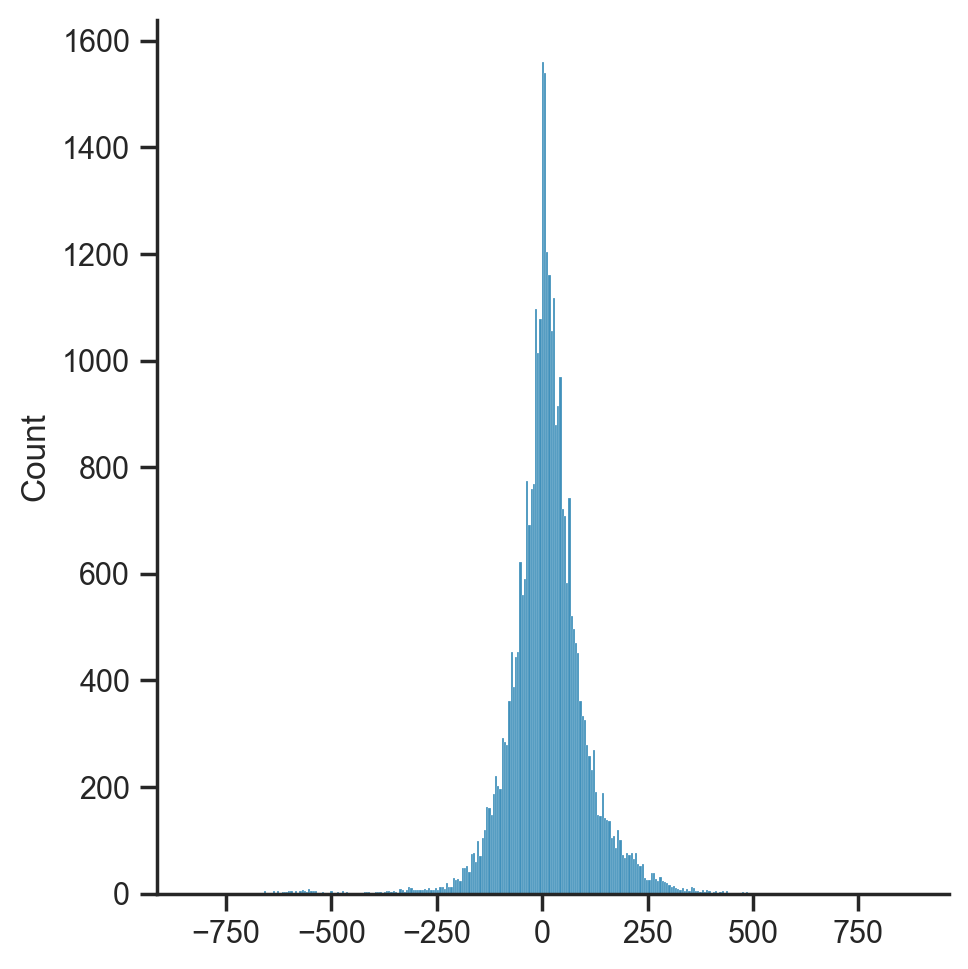

In [137]:
sns.displot(df[~df['AQI'].isna()]['AQI'] - df[~df['AQI'].isna()]['AQI_calculated'])

In [140]:
r2_score(df[~df['AQI'].isna()]['AQI'],df[~df['AQI'].isna()]['AQI_calculated'] )
mean_squared_error(df[~df['AQI'].isna()]['AQI'],df[~df['AQI'].isna()]['AQI_calculated'])

0.39167625879928736

9020.105804907242

In [153]:
# For CO, need 8 hour average
pd.DataFrame(
{    "Without avg": df[df['Station'] == "NISE"]['CO'][:20],
    "With avg": df[df['Station'] == "NISE"].groupby(["Station"
                                         ])["CO"].rolling(window=8).mean()[:20]
}
).reset_index()

,index,Without avg,With avg
0,0,2.55,NaN
1,1,2.42,NaN
2,2,2.40,NaN
3,3,2.36,NaN
4,4,2.24,NaN
5,5,2.20,NaN
6,6,2.23,NaN
7,7,2.29,NaN
8,8,2.34,NaN
9,9,2.10,NaN


In [158]:
# Sample rolling mean of window 2
df[df['Station'] == "NISE"]['CO'][:10],
df[df['Station'] == "NISE"].groupby(["Station"
                                         ])["CO"].rolling(window=8).mean()[:10]

(0    2.55
 1    2.42
 2    2.40
 3    2.36
 4    2.24
 5    2.20
 6    2.23
 7    2.29
 8    2.34
 9    2.10
 Name: CO, dtype: float64,)

Station   
NISE     0        NaN
         1        NaN
         2        NaN
         3        NaN
         4        NaN
         5        NaN
         6        NaN
         7    2.33625
         8    2.31000
         9    2.27000
Name: CO, dtype: float64

In [159]:
df.groupby(["Station"])["CO"].rolling(window=8).mean()


Station            
NISE         0             NaN
             1             NaN
             2             NaN
             3             NaN
             4             NaN
                        ...   
Vikas Sadan  147526    1.71000
             147527    1.51125
             147528    0.94250
             147529    0.75750
             147530    0.57875
Name: CO, Length: 147531, dtype: float64

In [160]:
df["CO_8_avg"] = df.groupby("Station")["CO"].rolling(window = 8).mean().values
df

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,...,Year,Week,Hour,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,AQI_calculated,PM2.5_24_avg,CO_8_avg
0,2020-03-04 00:00:00,NISE,88.67,17.92,31.11,49.03,9.906667,2.55,NaN,NaN,...,2020,10,0,195.566667,12.383333,61.2875,106.875,196.0,NaN,NaN
1,2020-03-04 01:00:00,NISE,82.42,16.90,29.54,46.43,8.286667,2.42,NaN,NaN,...,2020,10,1,174.733333,10.358333,58.0375,105.250,175.0,NaN,NaN
2,2020-03-04 02:00:00,NISE,82.35,17.71,29.56,47.33,8.940000,2.40,NaN,NaN,...,2020,10,2,174.500000,11.175000,59.1625,105.000,174.0,NaN,NaN
3,2020-03-04 03:00:00,NISE,102.34,18.05,27.90,45.92,9.916667,2.36,NaN,NaN,...,2020,10,3,241.133333,12.395833,57.4000,104.500,241.0,NaN,NaN
4,2020-03-04 04:00:00,NISE,97.36,15.49,23.88,39.35,9.733333,2.24,NaN,NaN,...,2020,10,4,224.533333,12.166667,49.1875,103.000,225.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,23.90,49.59,70.03,41.300000,0.87,NaN,NaN,...,2023,12,3,177.400000,51.625000,87.5375,43.500,177.0,49.372083,1.71000
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,24.25,53.15,71.91,40.560000,0.66,NaN,NaN,...,2023,12,4,139.866667,50.700000,89.8875,33.000,140.0,50.378750,1.51125
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,24.55,54.38,64.34,40.820000,0.28,NaN,NaN,...,2023,12,5,151.566667,51.025000,80.4250,14.000,152.0,51.747083,0.94250
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,23.09,54.48,72.73,39.290000,0.43,NaN,NaN,...,2023,12,6,130.233333,49.112500,90.9125,21.500,130.0,52.885000,0.75750


In [ ]:
# Now, PM2.5 is 24 hour avg, CO is 8 hour avg,
# NO2, SO2 it is only 1 hour average, we already have it. So no need to compute anything for SO2, NO2

#Next steps: Calculate sub_index for PM2.5_24_avg and others

In [162]:
df.columns

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour', 'PM2.5_SubIndex',
       'SO2_SubIndex', 'NOx_SubIndex', 'CO_SubIndex', 'AQI_calculated',
       'PM2.5_24_avg', 'CO_8_avg'],
      dtype='object')

In [163]:
df.drop(['PM2.5_SubIndex', 'CO_SubIndex'], axis=1, inplace=True)

In [165]:
df.columns

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour', 'SO2_SubIndex',
       'NOx_SubIndex', 'AQI_calculated', 'PM2.5_24_avg', 'CO_8_avg'],
      dtype='object')

In [166]:
df = df[[
    'Datetime',
    'Station',
    'PM2.5',
    'PM2.5_24_avg',
    'NO',
    'NO2',
    'NOx',
    'NOx_SubIndex',
    'SO2',
    'SO2_SubIndex',
    'CO',
    'CO_8_avg',
    'AQI',
    'AQI_Bucket',
    'Day',
    'Month',
    'Year',
    'Week',
    'Hour',
    'AQI_calculated'
]]
df

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,CO,CO_8_avg,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated
0,2020-03-04 00:00:00,NISE,88.67,NaN,17.92,31.11,49.03,61.2875,9.906667,12.383333,2.55,NaN,NaN,NaN,4,3,2020,10,0,196.0
1,2020-03-04 01:00:00,NISE,82.42,NaN,16.90,29.54,46.43,58.0375,8.286667,10.358333,2.42,NaN,NaN,NaN,4,3,2020,10,1,175.0
2,2020-03-04 02:00:00,NISE,82.35,NaN,17.71,29.56,47.33,59.1625,8.940000,11.175000,2.40,NaN,NaN,NaN,4,3,2020,10,2,174.0
3,2020-03-04 03:00:00,NISE,102.34,NaN,18.05,27.90,45.92,57.4000,9.916667,12.395833,2.36,NaN,NaN,NaN,4,3,2020,10,3,241.0
4,2020-03-04 04:00:00,NISE,97.36,NaN,15.49,23.88,39.35,49.1875,9.733333,12.166667,2.24,NaN,NaN,NaN,4,3,2020,10,4,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,0.87,1.71000,NaN,NaN,26,3,2023,12,3,177.0
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,0.66,1.51125,NaN,NaN,26,3,2023,12,4,140.0
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,0.28,0.94250,NaN,NaN,26,3,2023,12,5,152.0
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,0.43,0.75750,NaN,NaN,26,3,2023,12,6,130.0


#### Before computing sub index, remove missing values ( dont impute them )

In [177]:
df.isna().sum()

Datetime               0
Station                0
PM2.5                  0
PM2.5_24_avg         115
NO                     0
NO2                    0
NOx                    0
NOx_SubIndex           0
SO2                    0
SO2_SubIndex           0
CO                     0
CO_8_avg              35
AQI               114111
AQI_Bucket        114111
Day                    0
Month                  0
Year                   0
Week                   0
Hour                   0
AQI_calculated         0
dtype: int64

In [181]:
df['PM2.5_24_avg'].dropna(inplace=True) # Does not work as it creates a copy
# .isna().sum()

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/2477995249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PM2.5_24_avg'].dropna(inplace=True)


In [182]:
df.isna().sum()

Datetime               0
Station                0
PM2.5                  0
PM2.5_24_avg         115
NO                     0
NO2                    0
NOx                    0
NOx_SubIndex           0
SO2                    0
SO2_SubIndex           0
CO                     0
CO_8_avg              35
AQI               114111
AQI_Bucket        114111
Day                    0
Month                  0
Year                   0
Week                   0
Hour                   0
AQI_calculated         0
dtype: int64

In [194]:
df_copy = df.copy()

In [197]:
df_copy.loc[:,'PM2.5_24_avg'].dropna(inplace=True)
df_copy['PM2.5_24_avg'].dropna(inplace=True)

In [198]:
df_copy.isna().sum()

Datetime               0
Station                0
PM2.5                  0
PM2.5_24_avg         115
NO                     0
NO2                    0
NOx                    0
NOx_SubIndex           0
SO2                    0
SO2_SubIndex           0
CO                     0
CO_8_avg              35
AQI               114111
AQI_Bucket        114111
Day                    0
Month                  0
Year                   0
Week                   0
Hour                   0
AQI_calculated         0
dtype: int64

In [200]:
df_copy = df_copy[~df_copy['PM2.5_24_avg'].isna()]
df_copy

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,CO,CO_8_avg,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,1.76,1.75000,NaN,NaN,4,3,2020,10,23,88.0
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,1.71,1.72750,NaN,NaN,5,3,2020,10,0,86.0
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,1.74,1.72125,NaN,NaN,5,3,2020,10,1,87.0
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,1.60,1.71250,NaN,NaN,5,3,2020,10,2,80.0
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,1.56,1.71125,NaN,NaN,5,3,2020,10,3,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,0.87,1.71000,NaN,NaN,26,3,2023,12,3,177.0
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,0.66,1.51125,NaN,NaN,26,3,2023,12,4,140.0
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,0.28,0.94250,NaN,NaN,26,3,2023,12,5,152.0
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,0.43,0.75750,NaN,NaN,26,3,2023,12,6,130.0


In [201]:
df_copy.isna().sum()

Datetime               0
Station                0
PM2.5                  0
PM2.5_24_avg           0
NO                     0
NO2                    0
NOx                    0
NOx_SubIndex           0
SO2                    0
SO2_SubIndex           0
CO                     0
CO_8_avg               0
AQI               113996
AQI_Bucket        113996
Day                    0
Month                  0
Year                   0
Week                   0
Hour                   0
AQI_calculated         0
dtype: int64

In [202]:
#Doing same for df 

df = df[~df['PM2.5_24_avg'].isna()]
df

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,CO,CO_8_avg,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,1.76,1.75000,NaN,NaN,4,3,2020,10,23,88.0
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,1.71,1.72750,NaN,NaN,5,3,2020,10,0,86.0
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,1.74,1.72125,NaN,NaN,5,3,2020,10,1,87.0
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,1.60,1.71250,NaN,NaN,5,3,2020,10,2,80.0
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,1.56,1.71125,NaN,NaN,5,3,2020,10,3,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,0.87,1.71000,NaN,NaN,26,3,2023,12,3,177.0
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,0.66,1.51125,NaN,NaN,26,3,2023,12,4,140.0
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,0.28,0.94250,NaN,NaN,26,3,2023,12,5,152.0
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,0.43,0.75750,NaN,NaN,26,3,2023,12,6,130.0


In [203]:
df.isna().sum()

Datetime               0
Station                0
PM2.5                  0
PM2.5_24_avg           0
NO                     0
NO2                    0
NOx                    0
NOx_SubIndex           0
SO2                    0
SO2_SubIndex           0
CO                     0
CO_8_avg               0
AQI               113996
AQI_Bucket        113996
Day                    0
Month                  0
Year                   0
Week                   0
Hour                   0
AQI_calculated         0
dtype: int64

#### Now compute sub index

In [204]:
df.columns

Index(['Datetime', 'Station', 'PM2.5', 'PM2.5_24_avg', 'NO', 'NO2', 'NOx',
       'NOx_SubIndex', 'SO2', 'SO2_SubIndex', 'CO', 'CO_8_avg', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour', 'AQI_calculated'],
      dtype='object')

- PM2.5_24_avg subIndex
- CO_8_avg subIndex
-  NO2 subIndex
-  SO2 cross-check subIndex is right or not
-  NO subIndex (check if its 1 hour avg or not, if not, calculate average first)
- NOx subIndex (check if its 1 hour avg or not, if not, calculate average first)

 


- ### FOR CO, should you take 8 hour average or 8 hour max????
    - Answer, it is 8 hour average (refer to CPCB. https://cpcb.nic.in/displaypdf.php?id=bmF0aW9uYWwtYWlyLXF1YWxpdHktaW5kZXgvSG93X0FRSV9DYWxjdWxhdGVkLnBkZg== )

#### PM2.5_24_avg subIndex

In [250]:
df['PM2.5_24_avg_Sub_Index'] = df['PM2.5_24_avg'].apply(lambda x : get_PM25_subindex(x) )
df['PM2.5_24_avg_Sub_Index']

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/1275262193.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



23        144.804655
24        135.203362
25        126.533750
26        119.329224
27        108.443491
             ...    
147526     82.042486
147527     83.743405
147528     86.055417
147529     87.978103
147530     89.555819
Name: PM2.5_24_avg_Sub_Index, Length: 147416, dtype: float64

In [251]:
df

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,NaN,4,3,2020,10,23,88.0,144.804655,87.5000
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,NaN,5,3,2020,10,0,86.0,135.203362,86.3750
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,NaN,5,3,2020,10,1,87.0,126.533750,86.0625
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,NaN,5,3,2020,10,2,80.0,119.329224,85.6250
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,NaN,5,3,2020,10,3,78.0,108.443491,85.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,...,NaN,NaN,26,3,2023,12,3,177.0,82.042486,85.5000
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,...,NaN,NaN,26,3,2023,12,4,140.0,83.743405,75.5625
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,...,NaN,NaN,26,3,2023,12,5,152.0,86.055417,47.1250
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,NaN,26,3,2023,12,6,130.0,87.978103,37.8750


#### CO_8_avg subIndex

In [252]:
df['CO_8_avg_Sub_Index'] = df['CO_8_avg'].apply(lambda x : get_CO_subindex(x) )
df

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/886869333.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,NaN,4,3,2020,10,23,88.0,144.804655,86.388889
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,NaN,5,3,2020,10,0,86.0,135.203362,85.163889
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,NaN,5,3,2020,10,1,87.0,126.533750,84.823611
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,NaN,5,3,2020,10,2,80.0,119.329224,84.347222
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,NaN,5,3,2020,10,3,78.0,108.443491,84.279167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,...,NaN,NaN,26,3,2023,12,3,177.0,82.042486,84.211111
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,...,NaN,NaN,26,3,2023,12,4,140.0,83.743405,73.390278
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,...,NaN,NaN,26,3,2023,12,5,152.0,86.055417,47.125000
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,NaN,26,3,2023,12,6,130.0,87.978103,37.875000


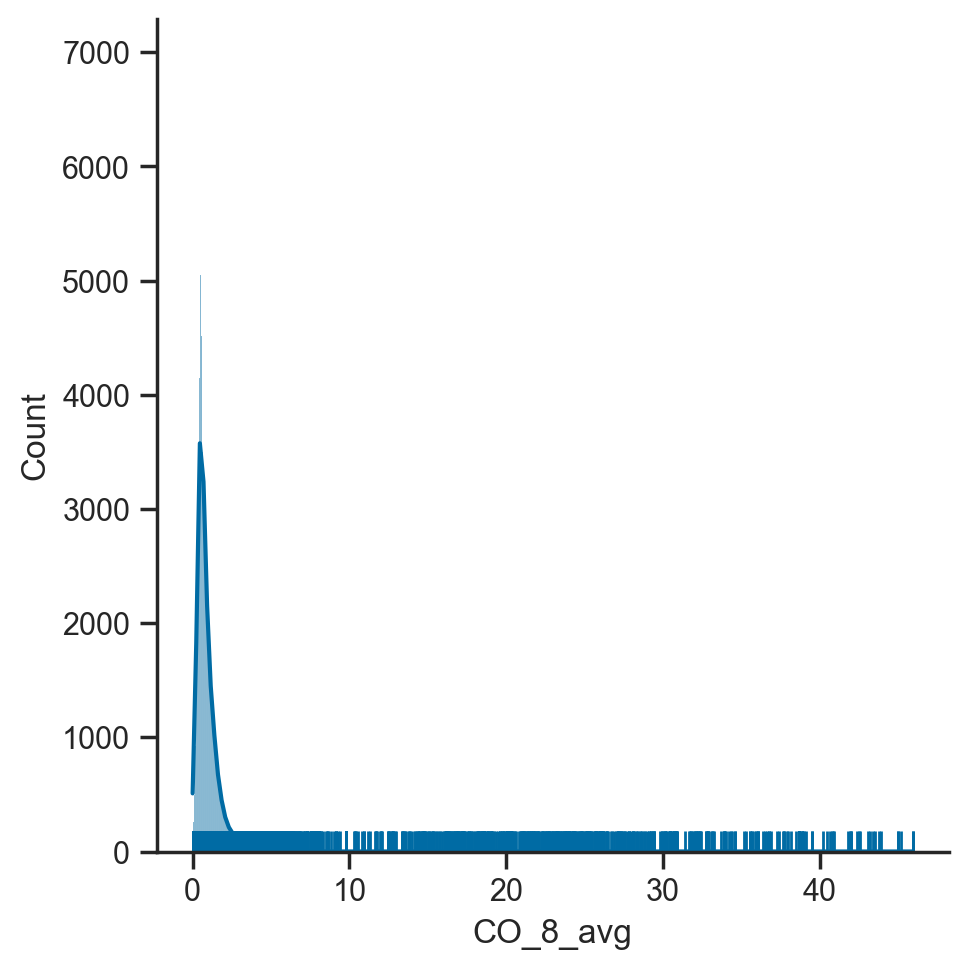

In [253]:
sns.displot(df['CO_8_avg'], kde = True, rug = True )

<AxesSubplot: >

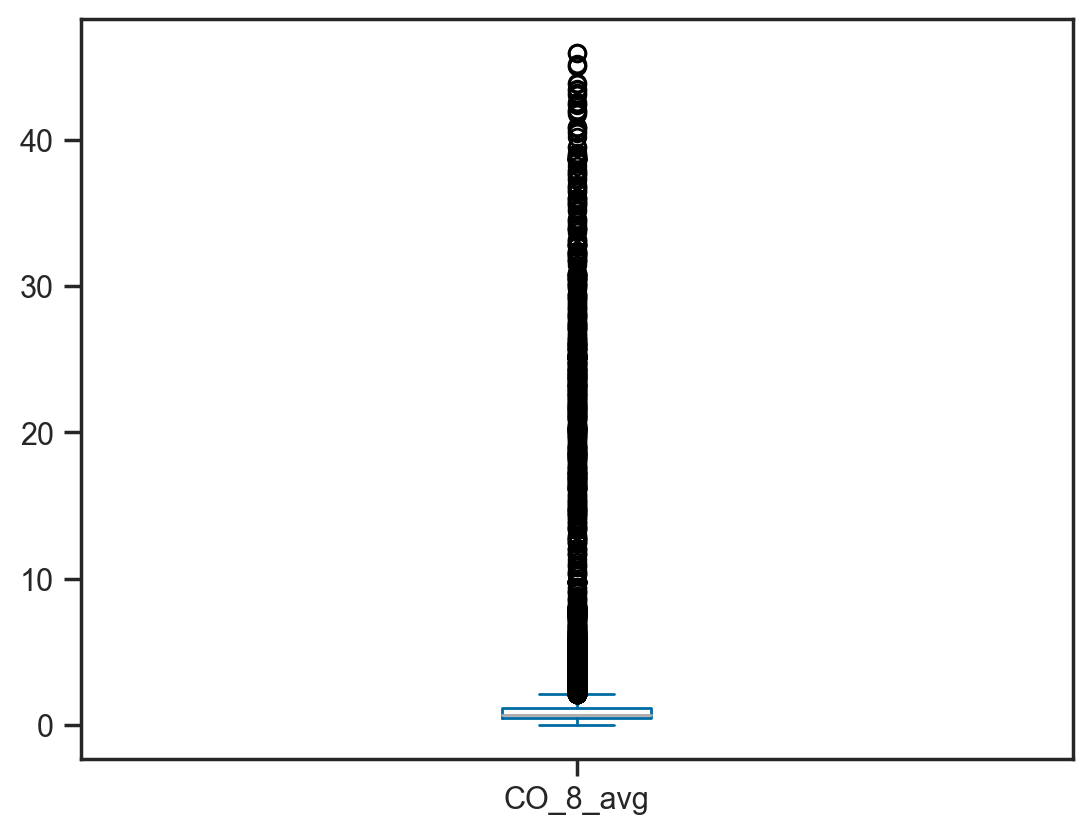

In [237]:
df['CO_8_avg'].plot.box()

In [211]:
df

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,NaN,4,3,2020,10,23,88.0,146.105556,87.5000
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,NaN,5,3,2020,10,0,86.0,136.730556,86.3750
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,NaN,5,3,2020,10,1,87.0,128.265278,86.0625
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,NaN,5,3,2020,10,2,80.0,121.230556,85.6250
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,NaN,5,3,2020,10,3,78.0,110.601389,85.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,...,NaN,NaN,26,3,2023,12,3,177.0,82.286806,85.5000
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,...,NaN,NaN,26,3,2023,12,4,140.0,83.964583,75.5625
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,...,NaN,NaN,26,3,2023,12,5,152.0,86.245139,47.1250
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,NaN,26,3,2023,12,6,130.0,88.141667,37.8750


#### NO2 subIndex

In [221]:
df.columns

Index(['Datetime', 'Station', 'PM2.5', 'PM2.5_24_avg', 'NO', 'NO2', 'NOx',
       'NOx_SubIndex', 'SO2', 'SO2_SubIndex', 'CO', 'CO_8_avg', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour', 'AQI_calculated',
       'PM2.5_24_avg_Sub_Index', 'CO_8_avg_Sub_Index'],
      dtype='object')

In [254]:
df['NO2_Sub_Index'] = df['NO2'].apply(lambda x : get_NO2_subindex(x) )
df

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/3183890732.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,4,3,2020,10,23,88.0,144.804655,86.388889,26.712500
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,5,3,2020,10,0,86.0,135.203362,85.163889,26.237500
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,5,3,2020,10,1,87.0,126.533750,84.823611,25.612500
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,5,3,2020,10,2,80.0,119.329224,84.347222,18.662500
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,5,3,2020,10,3,78.0,108.443491,84.279167,22.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.625000,...,NaN,26,3,2023,12,3,177.0,82.042486,84.211111,61.792564
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.700000,...,NaN,26,3,2023,12,4,140.0,83.743405,73.390278,66.265385
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,51.025000,...,NaN,26,3,2023,12,5,152.0,86.055417,47.125000,67.810769
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,26,3,2023,12,6,130.0,87.978103,37.875000,67.936410


#### SO2 subIndex

In [255]:
df['SO2_SubIndex'] = df['SO2'].apply(lambda x : get_SO2_subindex(x) )
df

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/3261172288.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,4,3,2020,10,23,88.0,144.804655,86.388889,26.712500
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,5,3,2020,10,0,86.0,135.203362,85.163889,26.237500
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,5,3,2020,10,1,87.0,126.533750,84.823611,25.612500
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,5,3,2020,10,2,80.0,119.329224,84.347222,18.662500
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,5,3,2020,10,3,78.0,108.443491,84.279167,22.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.376923,...,NaN,26,3,2023,12,3,177.0,82.042486,84.211111,61.792564
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.447179,...,NaN,26,3,2023,12,4,140.0,83.743405,73.390278,66.265385
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,50.773846,...,NaN,26,3,2023,12,5,152.0,86.055417,47.125000,67.810769
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,26,3,2023,12,6,130.0,87.978103,37.875000,67.936410


#### Checking AQI predicted vs actual



In [288]:
df['AQI_calculated']

23         88.0
24         86.0
25         87.0
26         80.0
27         78.0
          ...  
147526    177.0
147527    140.0
147528    152.0
147529    130.0
147530    121.0
Name: AQI_calculated, Length: 147416, dtype: float64

In [256]:
df.columns

Index(['Datetime', 'Station', 'PM2.5', 'PM2.5_24_avg', 'NO', 'NO2', 'NOx',
       'NOx_SubIndex', 'SO2', 'SO2_SubIndex', 'CO', 'CO_8_avg', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour', 'AQI_calculated',
       'PM2.5_24_avg_Sub_Index', 'CO_8_avg_Sub_Index', 'NO2_Sub_Index'],
      dtype='object')

In [257]:
round(df[~df['AQI'].isna()][["PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index", "NO2_Sub_Index"]].max(axis = 1))
df[~df['AQI'].isna()]['AQI']

28180    198.0
28181    198.0
28182    198.0
28183    196.0
28184    193.0
         ...  
67069     74.0
67070     76.0
67071     77.0
67072     78.0
67073     81.0
Length: 33420, dtype: float64

28180    232.0
28181    226.0
28182    218.0
28183    211.0
28184    204.0
         ...  
67069    154.0
67070    154.0
67071    155.0
67072    156.0
67073    157.0
Name: AQI, Length: 33420, dtype: float64

In [263]:
r2_score(
    round(df[~df['AQI'].isna()][[
        "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index"
    ]].max(axis=1)), df[~df['AQI'].isna()]['AQI'])
# 95.5% matching Yay :)))


# WE got 95.5% only because in subIndex formula we rounded 51 to 50, 101 to 100 etc. That's why we got the difference.
# Change the formula now and compute.

0.9553428371763654

In [264]:
#Including NO2 as well - 95.0

r2_score(
    round(df[~df['AQI'].isna()][[
        "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",
        "NO2_Sub_Index"
    ]].max(axis=1)), df[~df['AQI'].isna()]['AQI'])


0.9503261191915744

In [265]:
#Including NOx as well - 94.7

r2_score(
    round(df[~df['AQI'].isna()][[
        "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",'NOx_SubIndex',
        "NO2_Sub_Index"
    ]].max(axis=1)), df[~df['AQI'].isna()]['AQI'])


0.9477827354327941

### With this formula, impute missing AQI 

In [289]:
# Assigning AQI_calculated

df["AQI_calculated"] = round(df[["PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",'NOx_SubIndex',
        "NO2_Sub_Index"]].max(axis = 1))
df

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/2370224758.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,4,3,2020,10,23,145.0,144.804655,86.388889,26.712500
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,5,3,2020,10,0,135.0,135.203362,85.163889,26.237500
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,5,3,2020,10,1,127.0,126.533750,84.823611,25.612500
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,5,3,2020,10,2,119.0,119.329224,84.347222,18.662500
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,5,3,2020,10,3,108.0,108.443491,84.279167,22.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.376923,...,NaN,26,3,2023,12,3,88.0,82.042486,84.211111,61.792564
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.447179,...,NaN,26,3,2023,12,4,90.0,83.743405,73.390278,66.265385
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,50.773846,...,NaN,26,3,2023,12,5,86.0,86.055417,47.125000,67.810769
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,26,3,2023,12,6,91.0,87.978103,37.875000,67.936410


In [292]:
df.columns 

Index(['Datetime', 'Station', 'PM2.5', 'PM2.5_24_avg', 'NO', 'NO2', 'NOx',
       'NOx_SubIndex', 'SO2', 'SO2_SubIndex', 'CO', 'CO_8_avg', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour', 'AQI_calculated',
       'PM2.5_24_avg_Sub_Index', 'CO_8_avg_Sub_Index', 'NO2_Sub_Index'],
      dtype='object')

In [294]:
# Cross checking if correct values are assigned or not

(df['AQI_calculated'] == round(df[["PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",'NOx_SubIndex',
        "NO2_Sub_Index"]].max(axis = 1))).sum()

147416

<Figure size 2400x1400 with 0 Axes>

<Figure size 2400x1400 with 0 Axes>

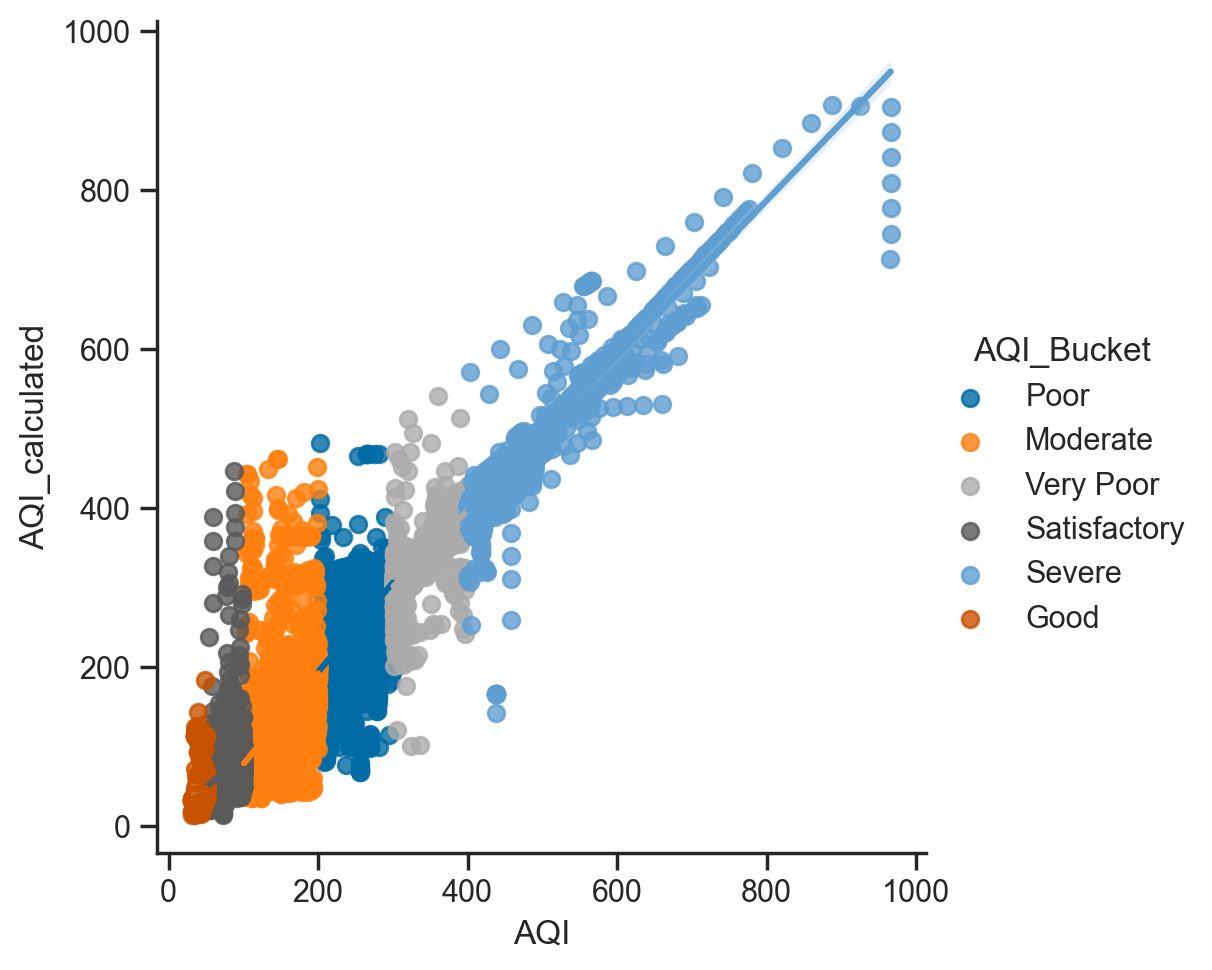

In [304]:
plt.figure(figsize=(24,14))
sns.lmplot(df[~df['AQI'].isna()], x='AQI',y='AQI_calculated',hue='AQI_Bucket')


<AxesSubplot: xlabel='AQI', ylabel='AQI_calculated'>

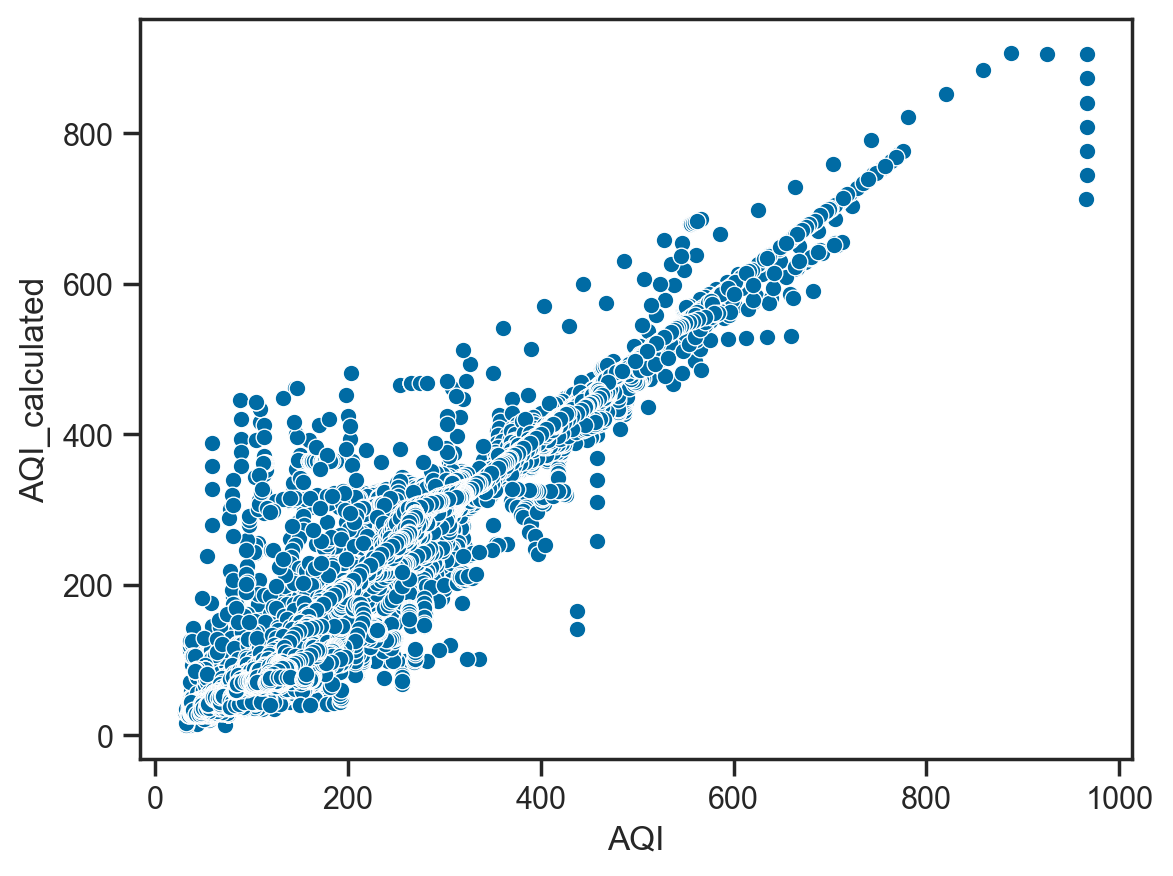

In [301]:
sns.scatterplot(df[~df['AQI'].isna()], x='AQI',y='AQI_calculated')

<AxesSubplot: xlabel='AQI_calculated', ylabel='AQI'>

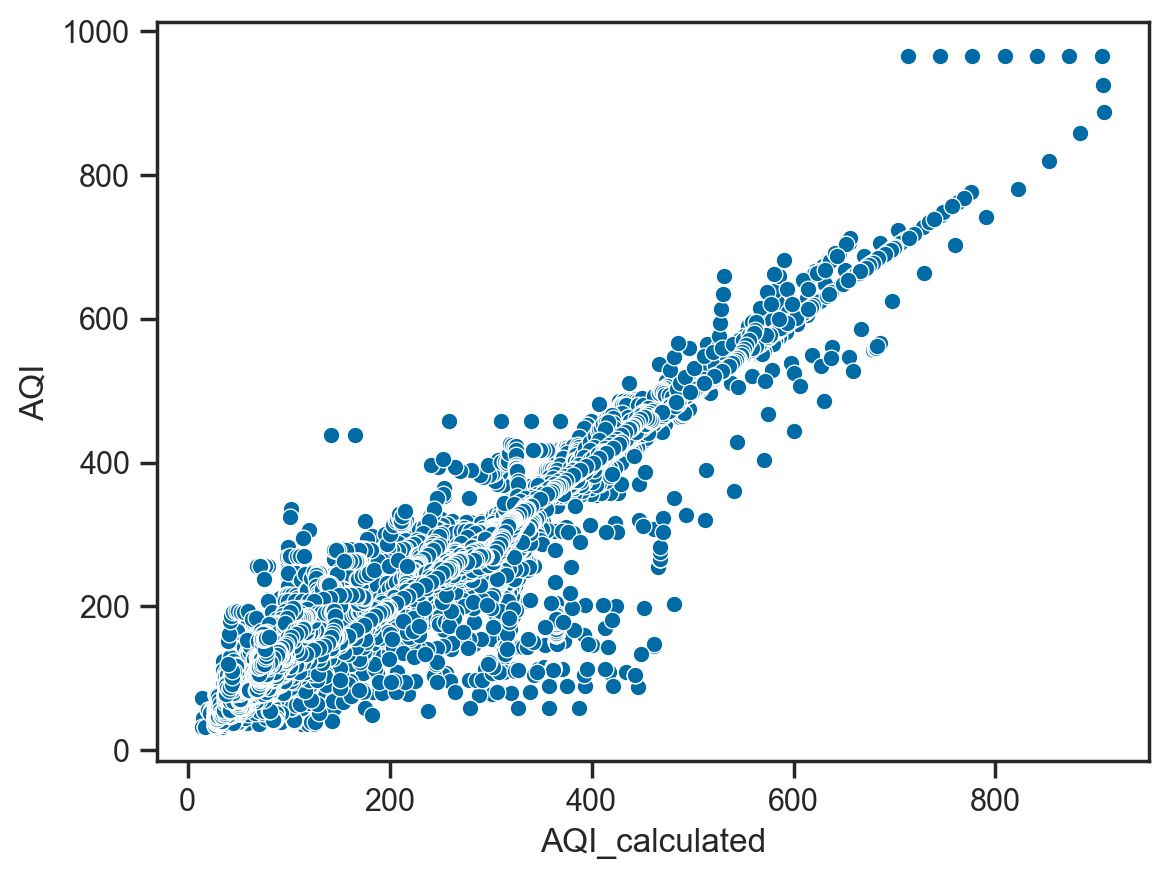

In [302]:
sns.scatterplot(df[~df['AQI'].isna()], x='AQI_calculated',y='AQI')

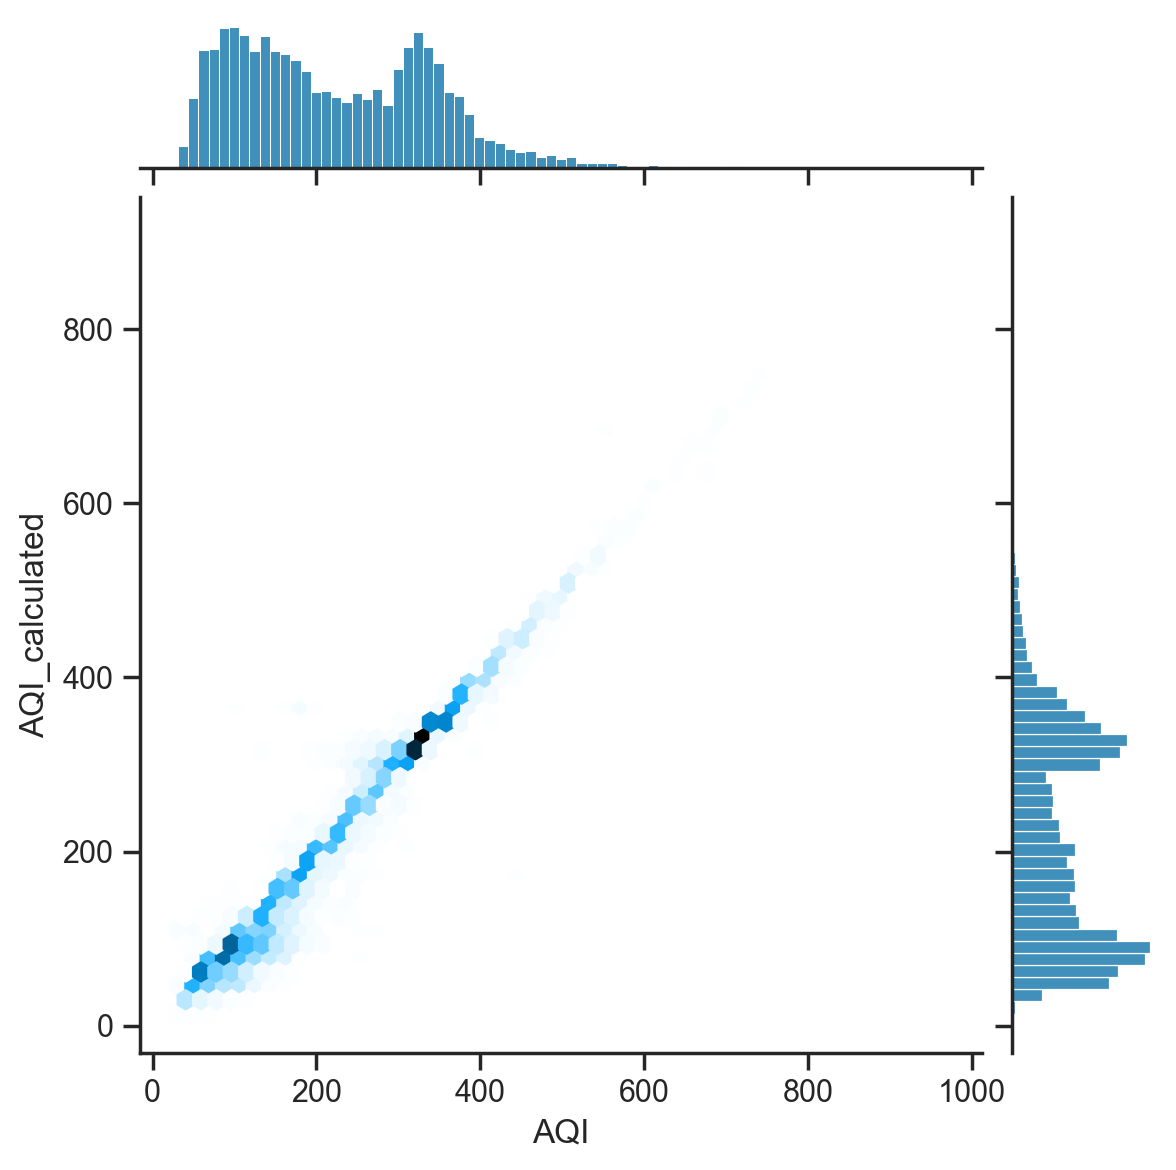

In [299]:
sns.jointplot(df[~df['AQI'].isna()], x='AQI',y='AQI_calculated', kind='hex')

In [320]:
df

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,4,3,2020,10,23,145.0,144.804655,86.388889,26.712500
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,5,3,2020,10,0,135.0,135.203362,85.163889,26.237500
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,5,3,2020,10,1,127.0,126.533750,84.823611,25.612500
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,5,3,2020,10,2,119.0,119.329224,84.347222,18.662500
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,5,3,2020,10,3,108.0,108.443491,84.279167,22.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.376923,...,NaN,26,3,2023,12,3,88.0,82.042486,84.211111,61.792564
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.447179,...,NaN,26,3,2023,12,4,90.0,83.743405,73.390278,66.265385
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,50.773846,...,NaN,26,3,2023,12,5,86.0,86.055417,47.125000,67.810769
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,26,3,2023,12,6,91.0,87.978103,37.875000,67.936410


In [325]:
df.isna().sum()

Datetime                       0
Station                        0
PM2.5                          0
PM2.5_24_avg                   0
NO                             0
NO2                            0
NOx                            0
NOx_SubIndex                   0
SO2                            0
SO2_SubIndex                   0
CO                             0
CO_8_avg                       0
AQI                       113996
AQI_Bucket                113996
Day                            0
Month                          0
Year                           0
Week                           0
Hour                           0
AQI_calculated                 0
PM2.5_24_avg_Sub_Index         0
CO_8_avg_Sub_Index             0
NO2_Sub_Index                  9
dtype: int64

In [327]:
get_AQI_bucket??

In [328]:
# df['AQI_Bucket']
df['AQI_Bucket'] = df['AQI_calculated'].apply(lambda x : get_AQI_bucket(x))

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_99940/2624805176.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [330]:
df.isna().sum()

Datetime                       0
Station                        0
PM2.5                          0
PM2.5_24_avg                   0
NO                             0
NO2                            0
NOx                            0
NOx_SubIndex                   0
SO2                            0
SO2_SubIndex                   0
CO                             0
CO_8_avg                       0
AQI                       113996
AQI_Bucket                     0
Day                            0
Month                          0
Year                           0
Week                           0
Hour                           0
AQI_calculated                 0
PM2.5_24_avg_Sub_Index         0
CO_8_avg_Sub_Index             0
NO2_Sub_Index                  9
dtype: int64

In [331]:
# df.to_csv('df_imputed_AQI_FINAL.csv')

In [322]:
df.isna().sum()

Datetime                       0
Station                        0
PM2.5                          0
PM2.5_24_avg                   0
NO                             0
NO2                            0
NOx                            0
NOx_SubIndex                   0
SO2                            0
SO2_SubIndex                   0
CO                             0
CO_8_avg                       0
AQI                       113996
AQI_Bucket                113996
Day                            0
Month                          0
Year                           0
Week                           0
Hour                           0
AQI_calculated                 0
PM2.5_24_avg_Sub_Index         0
CO_8_avg_Sub_Index             0
NO2_Sub_Index                  9
dtype: int64

In [287]:
# # Checking bucket

round(df[~df['AQI'].isna()][[
    "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",
    'NOx_SubIndex', "NO2_Sub_Index"
]].max(axis=1)).apply(lambda x: get_AQI_bucket(x))
df[~df['AQI'].isna()]['AQI_Bucket']

print("Percentage correct vs actual", ((round(df[~df['AQI'].isna()][[
    "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",
    'NOx_SubIndex', "NO2_Sub_Index"
]].max(axis=1)).apply(lambda x: get_AQI_bucket(x))
  == df[~df['AQI'].isna()]['AQI_Bucket']).sum() /
 df[~df['AQI'].isna()]['AQI_Bucket'].shape[0]) * 100)

28180        Moderate
28181        Moderate
28182        Moderate
28183        Moderate
28184        Moderate
             ...     
67069    Satisfactory
67070    Satisfactory
67071    Satisfactory
67072    Satisfactory
67073    Satisfactory
Length: 33420, dtype: object

28180        Poor
28181        Poor
28182        Poor
28183        Poor
28184        Poor
           ...   
67069    Moderate
67070    Moderate
67071    Moderate
67072    Moderate
67073    Moderate
Name: AQI_Bucket, Length: 33420, dtype: object

Percentage correct vs actual 80.90963494913225


In [277]:
aqi_df = pd.DataFrame({
    "Calculated" : df[~df['AQI'].isna()][[
        "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",'NOx_SubIndex',
        "NO2_Sub_Index"
    ]].max(axis=1) ,
    "Actual": df[~df['AQI'].isna()]['AQI'],
    "Difference": df[~df['AQI'].isna()][[
        "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",'NOx_SubIndex',
        "NO2_Sub_Index"
    ]].max(axis=1) - df[~df['AQI'].isna()]['AQI']
    
})
aqi_df

,Calculated,Actual,Difference
28180,197.779655,232.0,-34.220345
28181,197.597586,226.0,-28.402414
28182,197.846466,218.0,-20.153534
28183,195.637457,211.0,-15.362543
28184,193.000302,204.0,-10.999698
...,...,...,...
67069,74.376379,154.0,-79.623621
67070,75.780905,154.0,-78.219095
67071,76.707399,155.0,-78.292601
67072,78.492802,156.0,-77.507198


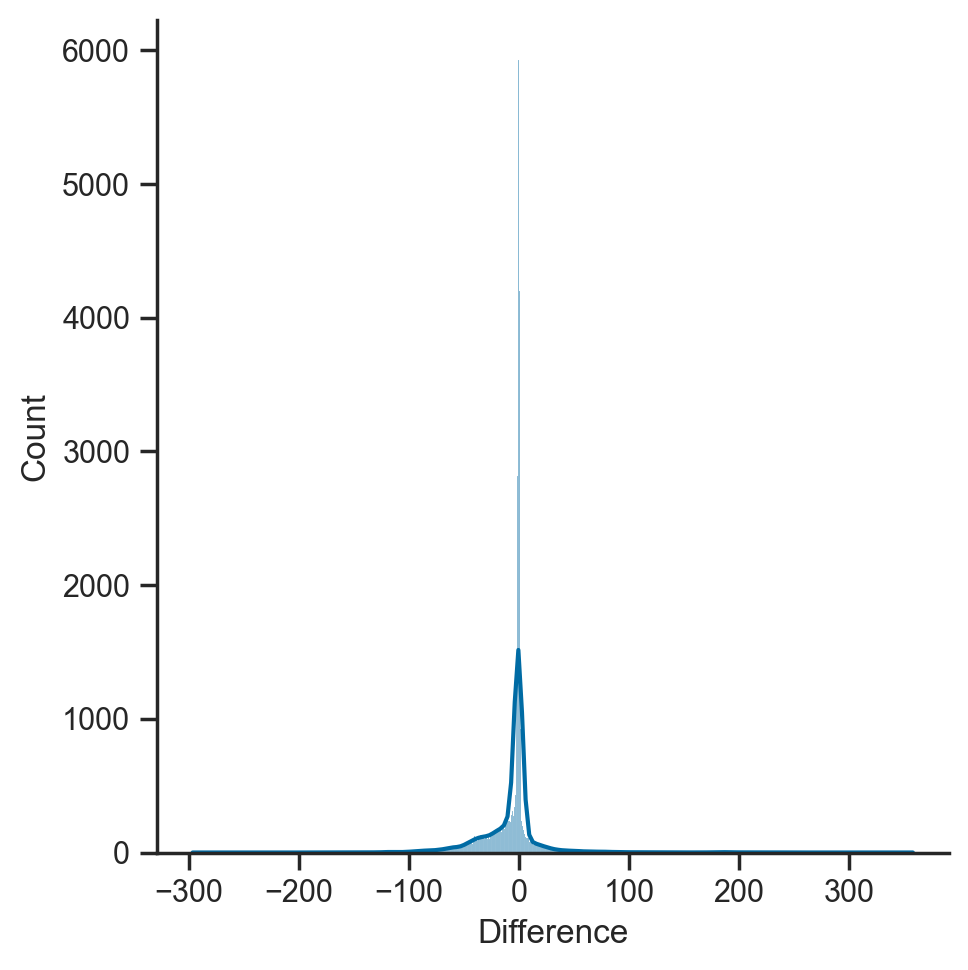

In [281]:
sns.displot(aqi_df['Difference'], kde = True)

<AxesSubplot: ylabel='Frequency'>

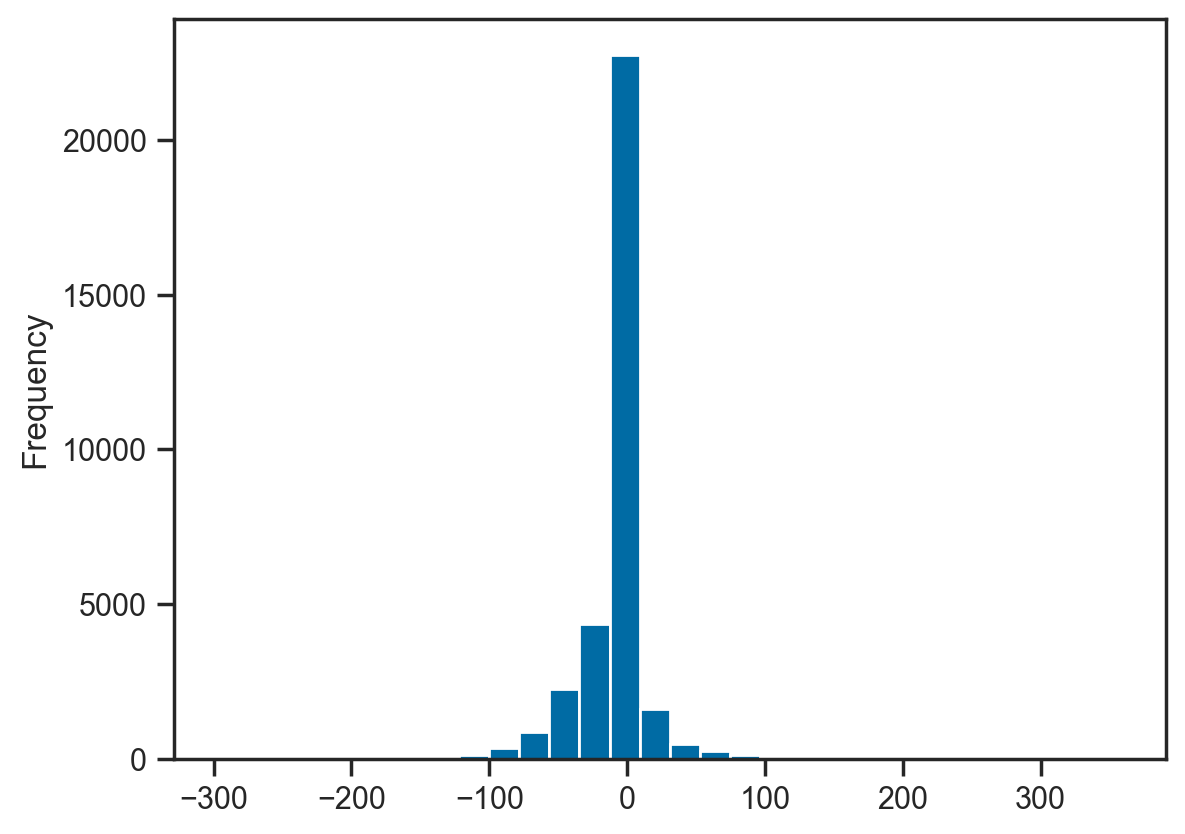

In [283]:
aqi_df['Difference'].plot.hist(bins=30)

In [230]:
# plt.figure(figsize=(20,8))
# sns.displot(df[~df['AQI'].isna()]['AQI'], kde = True, rug = True)
px.histogram(df[~df['AQI'].isna()],x='AQI', color="Station")

### With this formula, impute missing AQI 

In [269]:
round(df[[
        "PM2.5_24_avg_Sub_Index", "SO2_SubIndex", "CO_8_avg_Sub_Index",'NOx_SubIndex',
        "NO2_Sub_Index"
    ]].max(axis=1))

23        145.0
24        135.0
25        127.0
26        119.0
27        108.0
          ...  
147526     88.0
147527     90.0
147528     86.0
147529     91.0
147530     90.0
Length: 147416, dtype: float64

In [271]:
df

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,4,3,2020,10,23,88.0,144.804655,86.388889,26.712500
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,5,3,2020,10,0,86.0,135.203362,85.163889,26.237500
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,5,3,2020,10,1,87.0,126.533750,84.823611,25.612500
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,5,3,2020,10,2,80.0,119.329224,84.347222,18.662500
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,5,3,2020,10,3,78.0,108.443491,84.279167,22.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.376923,...,NaN,26,3,2023,12,3,177.0,82.042486,84.211111,61.792564
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.447179,...,NaN,26,3,2023,12,4,140.0,83.743405,73.390278,66.265385
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,50.773846,...,NaN,26,3,2023,12,5,152.0,86.055417,47.125000,67.810769
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,26,3,2023,12,6,130.0,87.978103,37.875000,67.936410


In [324]:
df.columns

Index(['Datetime', 'Station', 'PM2.5', 'PM2.5_24_avg', 'NO', 'NO2', 'NOx',
       'NOx_SubIndex', 'SO2', 'SO2_SubIndex', 'CO', 'CO_8_avg', 'AQI',
       'AQI_Bucket', 'Day', 'Month', 'Year', 'Week', 'Hour', 'AQI_calculated',
       'PM2.5_24_avg_Sub_Index', 'CO_8_avg_Sub_Index', 'NO2_Sub_Index'],
      dtype='object')

## Training the model - just testing

In [62]:
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
test = df[~df['AQI'].isna()].copy()
test

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour
28180,2016-01-23 11:00:00,No Station,77.74,14.13,11.83,15.50,11.42,0.58,232.0,Poor,23,1,2016,3,11
28181,2016-01-23 12:00:00,No Station,69.80,17.84,13.91,16.90,10.00,0.38,226.0,Poor,23,1,2016,3,12
28182,2016-01-23 13:00:00,No Station,55.86,20.73,7.14,15.01,8.00,0.25,218.0,Poor,23,1,2016,3,13
28183,2016-01-23 14:00:00,No Station,55.55,15.63,12.43,16.00,7.63,0.23,211.0,Poor,23,1,2016,3,14
28184,2016-01-23 15:00:00,No Station,52.54,23.19,6.08,16.91,7.46,0.17,204.0,Poor,23,1,2016,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67069,2020-06-30 20:00:00,No Station,54.74,6.23,10.67,12.60,4.18,0.60,154.0,Moderate,30,6,2020,27,20
67070,2020-06-30 21:00:00,No Station,54.37,6.30,10.28,11.88,4.03,1.20,154.0,Moderate,30,6,2020,27,21
67071,2020-06-30 22:00:00,No Station,50.34,6.93,10.36,13.01,6.17,1.00,155.0,Moderate,30,6,2020,27,22
67072,2020-06-30 23:00:00,No Station,53.23,6.64,10.30,12.75,6.31,0.86,156.0,Moderate,30,6,2020,27,23


In [26]:

pd.get_dummies(test, columns = ['Station'])

,Datetime,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour,Station_No Station
28180,2016-01-23 11:00:00,77.74,14.13,11.83,15.50,11.42,0.58,232.0,Poor,23,1,2016,3,11,1
28181,2016-01-23 12:00:00,69.80,17.84,13.91,16.90,10.00,0.38,226.0,Poor,23,1,2016,3,12,1
28182,2016-01-23 13:00:00,55.86,20.73,7.14,15.01,8.00,0.25,218.0,Poor,23,1,2016,3,13,1
28183,2016-01-23 14:00:00,55.55,15.63,12.43,16.00,7.63,0.23,211.0,Poor,23,1,2016,3,14,1
28184,2016-01-23 15:00:00,52.54,23.19,6.08,16.91,7.46,0.17,204.0,Poor,23,1,2016,3,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67069,2020-06-30 20:00:00,54.74,6.23,10.67,12.60,4.18,0.60,154.0,Moderate,30,6,2020,27,20,1
67070,2020-06-30 21:00:00,54.37,6.30,10.28,11.88,4.03,1.20,154.0,Moderate,30,6,2020,27,21,1
67071,2020-06-30 22:00:00,50.34,6.93,10.36,13.01,6.17,1.00,155.0,Moderate,30,6,2020,27,22,1
67072,2020-06-30 23:00:00,53.23,6.64,10.30,12.75,6.31,0.86,156.0,Moderate,30,6,2020,27,23,1


In [28]:
test['Station'] = 1 # If you encode it with 0 how does it affect training the model?
test

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,AQI,AQI_Bucket,Day,Month,Year,Week,Hour
28180,2016-01-23 11:00:00,1,77.74,14.13,11.83,15.50,11.42,0.58,232.0,Poor,23,1,2016,3,11
28181,2016-01-23 12:00:00,1,69.80,17.84,13.91,16.90,10.00,0.38,226.0,Poor,23,1,2016,3,12
28182,2016-01-23 13:00:00,1,55.86,20.73,7.14,15.01,8.00,0.25,218.0,Poor,23,1,2016,3,13
28183,2016-01-23 14:00:00,1,55.55,15.63,12.43,16.00,7.63,0.23,211.0,Poor,23,1,2016,3,14
28184,2016-01-23 15:00:00,1,52.54,23.19,6.08,16.91,7.46,0.17,204.0,Poor,23,1,2016,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67069,2020-06-30 20:00:00,1,54.74,6.23,10.67,12.60,4.18,0.60,154.0,Moderate,30,6,2020,27,20
67070,2020-06-30 21:00:00,1,54.37,6.30,10.28,11.88,4.03,1.20,154.0,Moderate,30,6,2020,27,21
67071,2020-06-30 22:00:00,1,50.34,6.93,10.36,13.01,6.17,1.00,155.0,Moderate,30,6,2020,27,22
67072,2020-06-30 23:00:00,1,53.23,6.64,10.30,12.75,6.31,0.86,156.0,Moderate,30,6,2020,27,23


In [31]:
test['Datetime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 33420 entries, 28180 to 67073
Series name: Datetime
Non-Null Count  Dtype 
--------------  ----- 
33420 non-null  object
dtypes: object(1)
memory usage: 522.2+ KB


In [70]:
test.drop(['Datetime','AQI','AQI_Bucket','Station'],axis=1)

,PM2.5,NO,NO2,NOx,SO2,CO,Day,Month,Year,Week,Hour
28180,77.74,14.13,11.83,15.50,11.42,0.58,23,1,2016,3,11
28181,69.80,17.84,13.91,16.90,10.00,0.38,23,1,2016,3,12
28182,55.86,20.73,7.14,15.01,8.00,0.25,23,1,2016,3,13
28183,55.55,15.63,12.43,16.00,7.63,0.23,23,1,2016,3,14
28184,52.54,23.19,6.08,16.91,7.46,0.17,23,1,2016,3,15
...,...,...,...,...,...,...,...,...,...,...,...
67069,54.74,6.23,10.67,12.60,4.18,0.60,30,6,2020,27,20
67070,54.37,6.30,10.28,11.88,4.03,1.20,30,6,2020,27,21
67071,50.34,6.93,10.36,13.01,6.17,1.00,30,6,2020,27,22
67072,53.23,6.64,10.30,12.75,6.31,0.86,30,6,2020,27,23


In [72]:
from sklearn.preprocessing import MinMaxScaler
df_test_normalized = MinMaxScaler().fit_transform(test.drop(['Datetime','AQI_Bucket','Station'],axis=1).copy())
df_test_normalized = pd.DataFrame(df_test_normalized)
df_test_normalized.columns = test.drop(['Datetime','AQI_Bucket','Station'],axis=1).columns 
df_test_normalized

,PM2.5,NO,NO2,NOx,SO2,CO,AQI,Day,Month,Year,Week,Hour
0,0.077676,0.029258,0.023833,0.031931,0.059773,0.011772,0.214973,0.733333,0.000000,0.0,0.039216,0.478261
1,0.069736,0.036946,0.028030,0.034815,0.052334,0.007713,0.208556,0.733333,0.000000,0.0,0.039216,0.521739
2,0.055794,0.042934,0.014368,0.030922,0.041857,0.005074,0.200000,0.733333,0.000000,0.0,0.039216,0.565217
3,0.055484,0.032366,0.025043,0.032961,0.039918,0.004668,0.192513,0.733333,0.000000,0.0,0.039216,0.608696
4,0.052474,0.048031,0.012229,0.034836,0.039028,0.003450,0.185027,0.733333,0.000000,0.0,0.039216,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...
33415,0.054674,0.012889,0.021492,0.025957,0.021845,0.012178,0.131551,0.966667,0.454545,1.0,0.509804,0.869565
33416,0.054304,0.013034,0.020705,0.024474,0.021059,0.024356,0.131551,0.966667,0.454545,1.0,0.509804,0.913043
33417,0.050274,0.014339,0.020866,0.026802,0.032270,0.020296,0.132620,0.966667,0.454545,1.0,0.509804,0.956522
33418,0.053164,0.013738,0.020745,0.026266,0.033003,0.017455,0.133690,0.966667,0.454545,1.0,0.509804,1.000000


LinearRegression()
score(X_test, y_test)  0.49465201936257697
Average cv score  -0.008565258506827609
mean_squared_log_error  0.07373109493830479
mean_squared_error  0.008446397420128303
r2_score  0.49465201936257697

DecisionTreeRegressor()
score(X_test, y_test)  0.7620146340101278
Average cv score  -0.00504088951214189
mean_squared_log_error  0.05057981290446492
mean_squared_error  0.0039776927154031045
r2_score  0.7620146340101278

RandomForestRegressor()
score(X_test, y_test)  0.8808455722431171
Average cv score  -0.002457392209118998
mean_squared_log_error  0.03577488697637896
mean_squared_error  0.0019915497632604375
r2_score  0.8808455722431171

AdaBoostRegressor()
score(X_test, y_test)  0.56171088586376
Average cv score  -0.007712671730376826
mean_squared_log_error  0.07146020858108451
mean_squared_error  0.007325574029683799
r2_score  0.56171088586376

BaggingRegressor()
score(X_test, y_test)  0.8598510383101892
Average cv score  -0.0028109203369988353
mean_squared_log_error  

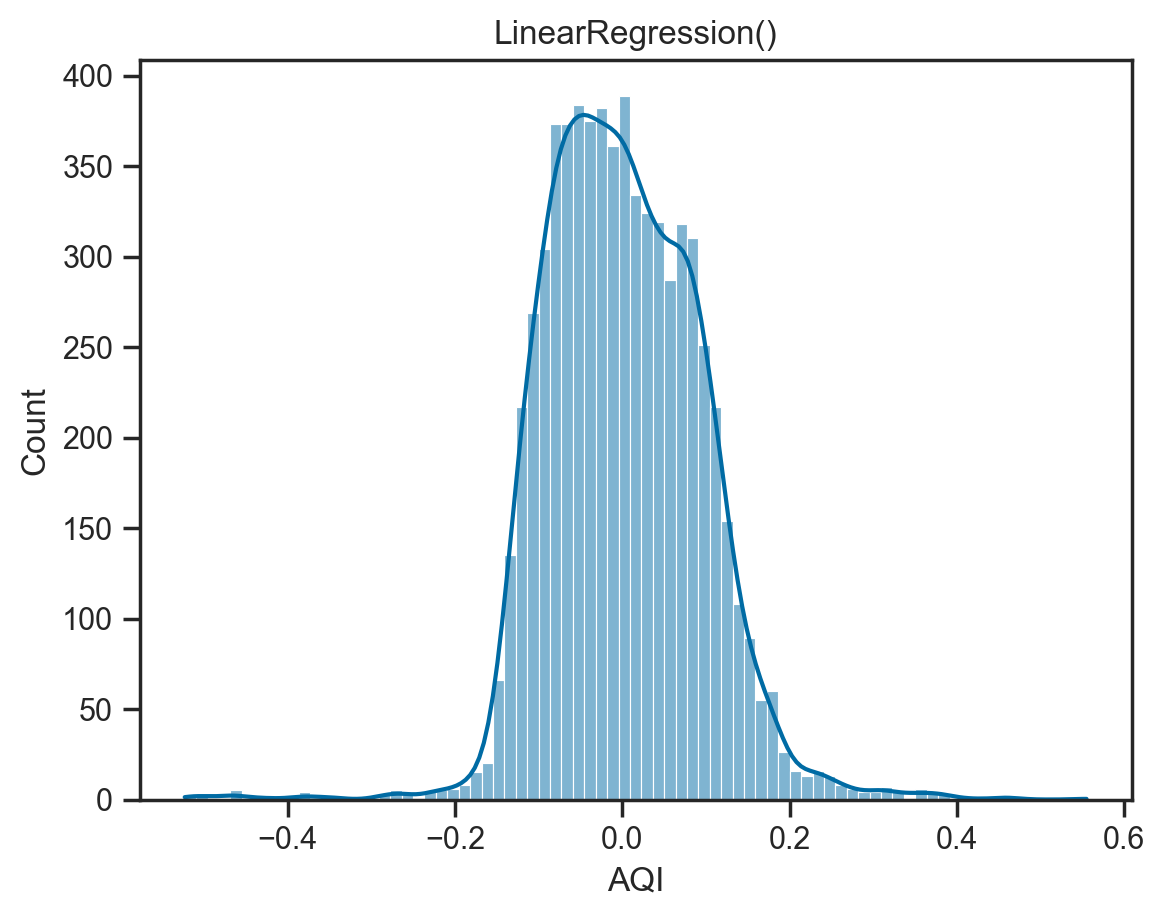

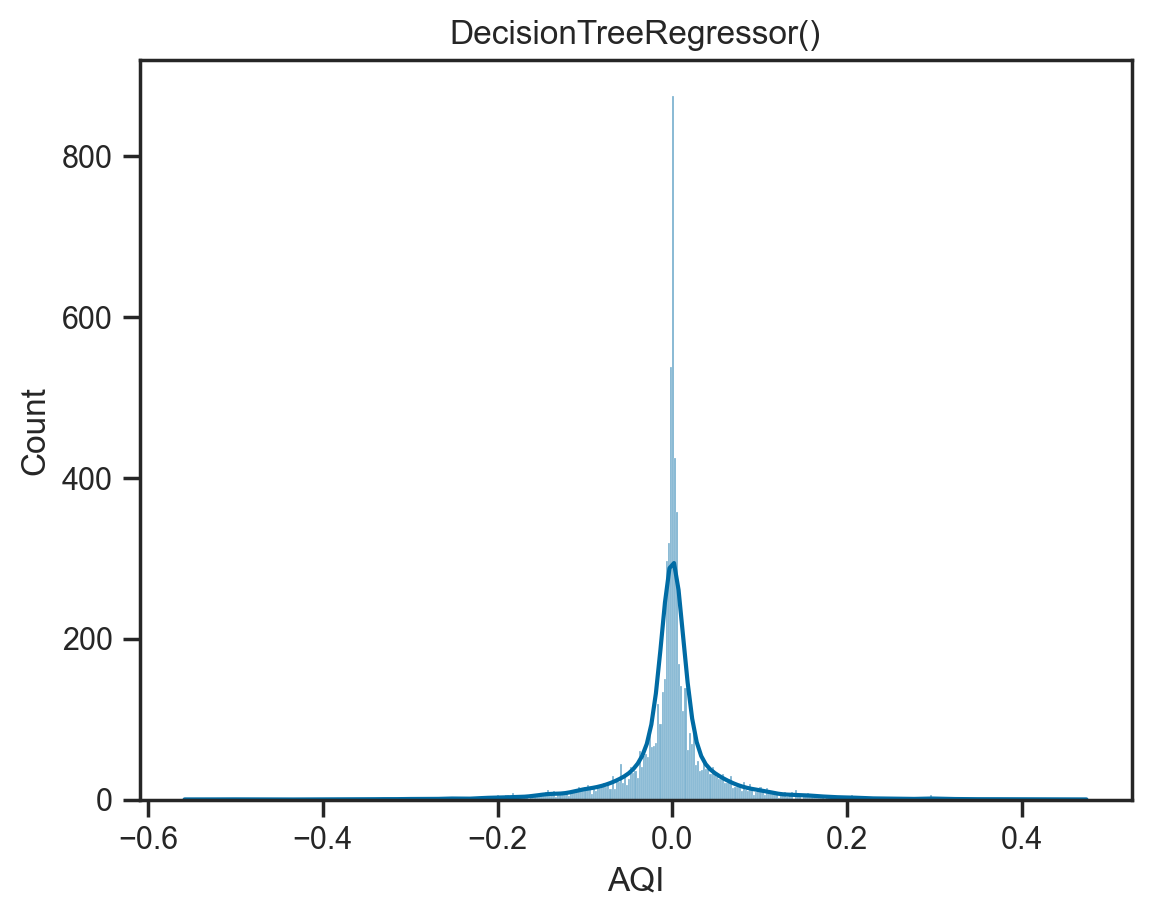

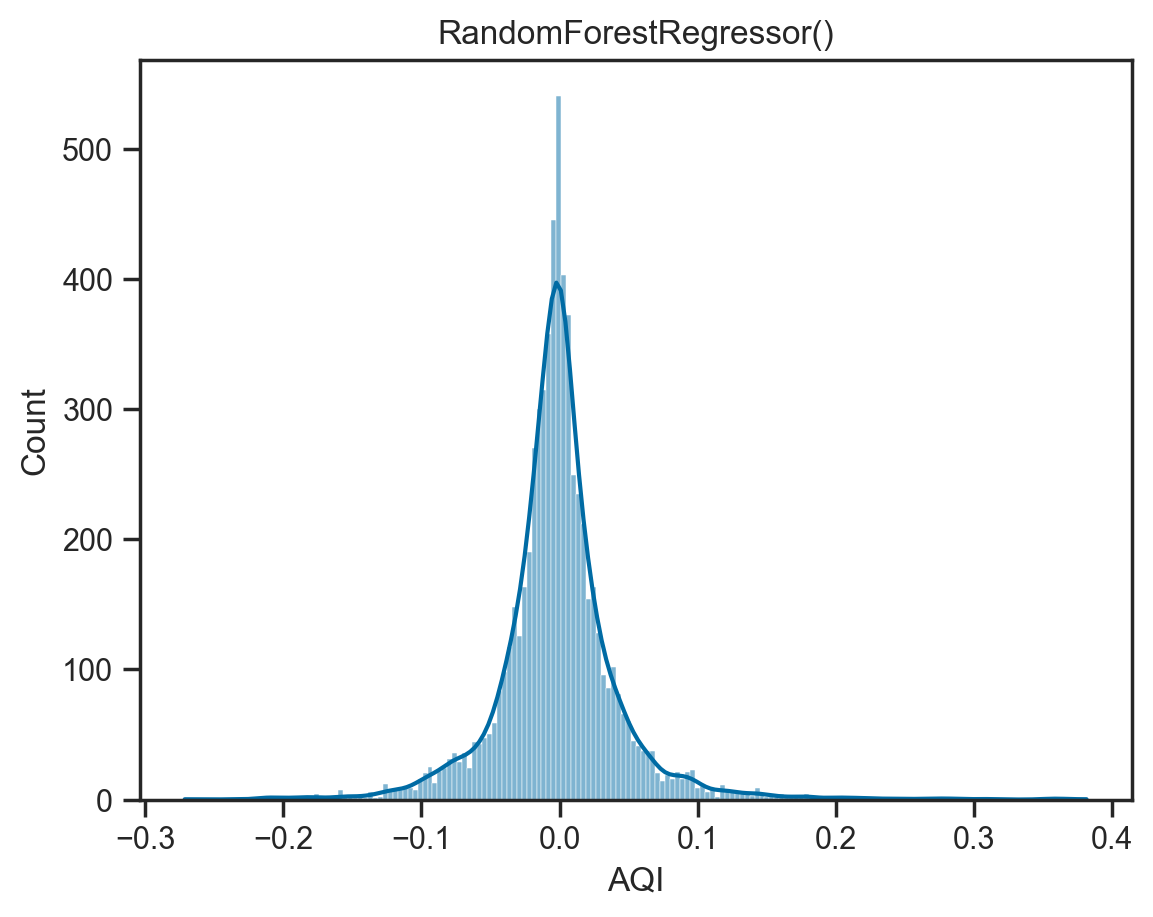

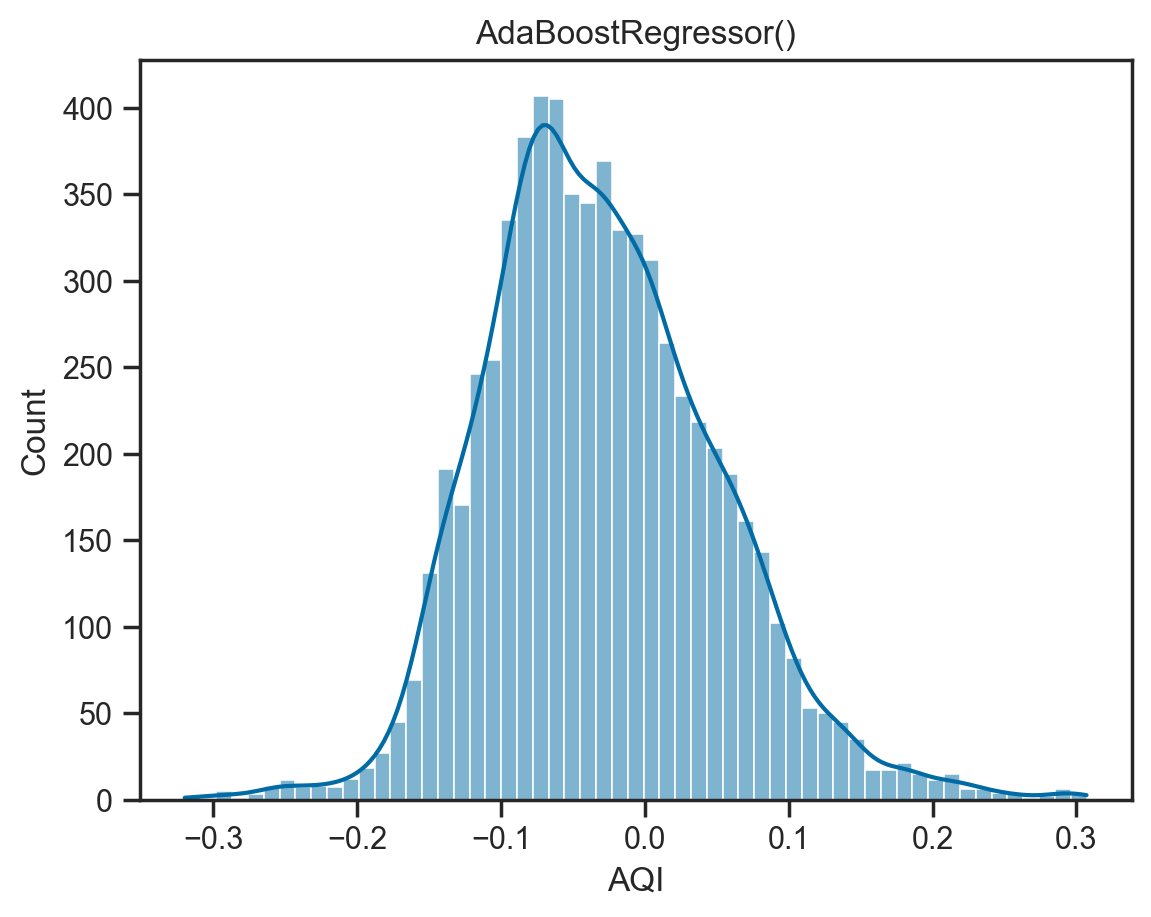

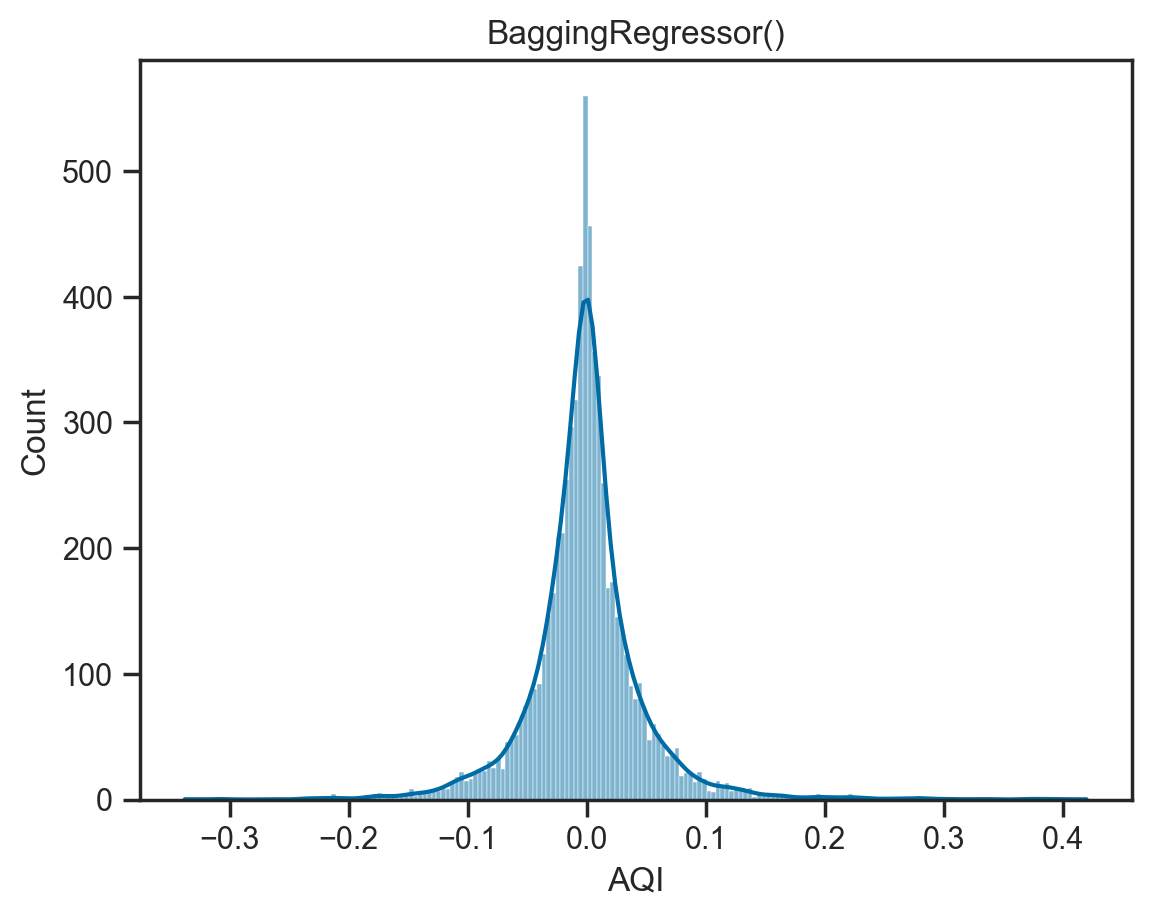

In [73]:
# Before training, standardize/normalize 

X_train, X_test, y_train, y_test = train_test_split(
    df_test_normalized.drop(['AQI'],axis=1),
                                                    df_test_normalized['AQI'],
                                                    train_size=0.8)


def helper(model):
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))
    s = cross_val_score(estimator=model,
                        X=X_train,
                        y=y_train,
                        scoring='neg_mean_squared_error',
                        cv=3)
    print("Average cv score ", np.mean(s))
    print("mean_squared_log_error ",
          mean_squared_log_error(y_test, y_pred, squared=False))
    print("mean_squared_error ",
      mean_squared_error(y_test, y_pred))
    print("r2_score ",
      r2_score(y_test, y_pred))
    
    print()


lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()
for i in [lr, tree, rf, ab, br]:
    helper(i)

# 2

In [305]:
test_2 = df.copy()
test_2

,Datetime,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
23,2020-03-04 23:00:00,NISE,28.89,73.831667,7.25,21.37,28.63,35.7875,7.690000,9.612500,...,NaN,4,3,2020,10,23,145.0,144.804655,86.388889,26.712500
24,2020-03-05 00:00:00,NISE,21.17,71.019167,7.41,20.99,28.41,35.5125,7.440000,9.300000,...,NaN,5,3,2020,10,0,135.0,135.203362,85.163889,26.237500
25,2020-03-05 01:00:00,NISE,21.47,68.479583,7.48,20.49,27.97,34.9625,6.823333,8.529167,...,NaN,5,3,2020,10,1,127.0,126.533750,84.823611,25.612500
26,2020-03-05 02:00:00,NISE,31.70,66.369167,7.28,14.93,22.22,27.7750,6.633333,8.291667,...,NaN,5,3,2020,10,2,119.0,119.329224,84.347222,18.662500
27,2020-03-05 03:00:00,NISE,25.81,63.180417,7.85,17.92,25.77,32.2125,6.583333,8.229167,...,NaN,5,3,2020,10,3,108.0,108.443491,84.279167,22.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147526,2023-03-26 03:00:00,Vikas Sadan,83.22,49.372083,23.90,49.59,70.03,87.5375,41.300000,51.376923,...,NaN,26,3,2023,12,3,88.0,82.042486,84.211111,61.792564
147527,2023-03-26 04:00:00,Vikas Sadan,71.96,50.378750,24.25,53.15,71.91,89.8875,40.560000,50.447179,...,NaN,26,3,2023,12,4,90.0,83.743405,73.390278,66.265385
147528,2023-03-26 05:00:00,Vikas Sadan,75.47,51.747083,24.55,54.38,64.34,80.4250,40.820000,50.773846,...,NaN,26,3,2023,12,5,86.0,86.055417,47.125000,67.810769
147529,2023-03-26 06:00:00,Vikas Sadan,69.07,52.885000,23.09,54.48,72.73,90.9125,39.290000,49.112500,...,NaN,26,3,2023,12,6,91.0,87.978103,37.875000,67.936410


In [310]:
df_test_normalized = MinMaxScaler().fit_transform(test_2.drop(['Datetime','AQI_Bucket','Station','AQI'],axis=1).copy())
df_test_normalized = pd.DataFrame(df_test_normalized)
df_test_normalized.columns = test_2.drop(['Datetime','AQI_Bucket','Station',"AQI"],axis=1).columns 
df_test_normalized

,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,CO,CO_8_avg,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
0,0.028881,0.081109,0.014481,0.043104,0.057637,0.074463,0.038523,0.068483,0.035722,0.038093,0.100000,0.181818,0.625,0.173077,1.000000,0.146697,0.159524,0.183714,0.066762
1,0.021160,0.078014,0.014801,0.042337,0.057194,0.073891,0.037269,0.066254,0.034707,0.037603,0.133333,0.181818,0.625,0.173077,0.000000,0.135498,0.148931,0.181109,0.065574
2,0.021460,0.075219,0.014941,0.041328,0.056308,0.072746,0.034176,0.060755,0.035316,0.037467,0.133333,0.181818,0.625,0.173077,0.043478,0.126540,0.139365,0.180385,0.064011
3,0.031691,0.072897,0.014541,0.030108,0.044733,0.057791,0.033223,0.059061,0.032474,0.037277,0.133333,0.181818,0.625,0.173077,0.086957,0.117581,0.131417,0.179372,0.046633
4,0.025801,0.069388,0.015681,0.036142,0.051879,0.067024,0.032972,0.058615,0.031662,0.037250,0.133333,0.181818,0.625,0.173077,0.130435,0.105263,0.119406,0.179228,0.055979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147411,0.083212,0.054191,0.047782,0.100050,0.140982,0.182139,0.207113,0.366417,0.017658,0.037222,0.833333,0.181818,1.000,0.211538,0.130435,0.082867,0.090278,0.179083,0.154477
147412,0.071951,0.055299,0.048482,0.107234,0.144767,0.187029,0.203401,0.359785,0.013396,0.032896,0.833333,0.181818,1.000,0.211538,0.173913,0.085106,0.092155,0.156071,0.165662
147413,0.075462,0.056805,0.049082,0.109716,0.129527,0.167340,0.204705,0.362115,0.005683,0.020516,0.833333,0.181818,1.000,0.211538,0.217391,0.080627,0.094706,0.100216,0.169526
147414,0.069061,0.058057,0.046162,0.109918,0.146418,0.189161,0.197030,0.350263,0.008727,0.016489,0.833333,0.181818,1.000,0.211538,0.260870,0.086226,0.096827,0.080545,0.169840


In [311]:
df_test_normalized.isna().sum()

PM2.5                     0
PM2.5_24_avg              0
NO                        0
NO2                       0
NOx                       0
NOx_SubIndex              0
SO2                       0
SO2_SubIndex              0
CO                        0
CO_8_avg                  0
Day                       0
Month                     0
Year                      0
Week                      0
Hour                      0
AQI_calculated            0
PM2.5_24_avg_Sub_Index    0
CO_8_avg_Sub_Index        0
NO2_Sub_Index             9
dtype: int64

In [313]:
df_test_normalized.dropna(inplace=True)
df_test_normalized.isna().sum()

PM2.5                     0
PM2.5_24_avg              0
NO                        0
NO2                       0
NOx                       0
NOx_SubIndex              0
SO2                       0
SO2_SubIndex              0
CO                        0
CO_8_avg                  0
Day                       0
Month                     0
Year                      0
Week                      0
Hour                      0
AQI_calculated            0
PM2.5_24_avg_Sub_Index    0
CO_8_avg_Sub_Index        0
NO2_Sub_Index             0
dtype: int64

In [318]:
df_test_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147407 entries, 0 to 147415
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   PM2.5                   147407 non-null  float64
 1   PM2.5_24_avg            147407 non-null  float64
 2   NO                      147407 non-null  float64
 3   NO2                     147407 non-null  float64
 4   NOx                     147407 non-null  float64
 5   NOx_SubIndex            147407 non-null  float64
 6   SO2                     147407 non-null  float64
 7   SO2_SubIndex            147407 non-null  float64
 8   CO                      147407 non-null  float64
 9   CO_8_avg                147407 non-null  float64
 10  Day                     147407 non-null  float64
 11  Month                   147407 non-null  float64
 12  Year                    147407 non-null  float64
 13  Week                    147407 non-null  float64
 14  Hour                

LinearRegression()
score(X_test, y_test)  0.9870776051518597
Average cv score  -0.0002654928629014388
r2_score  0.9870776051518597

DecisionTreeRegressor()


MemoryError: Unable to allocate 56.8 PiB for an array with shape (7990812763079135,) and data type float64

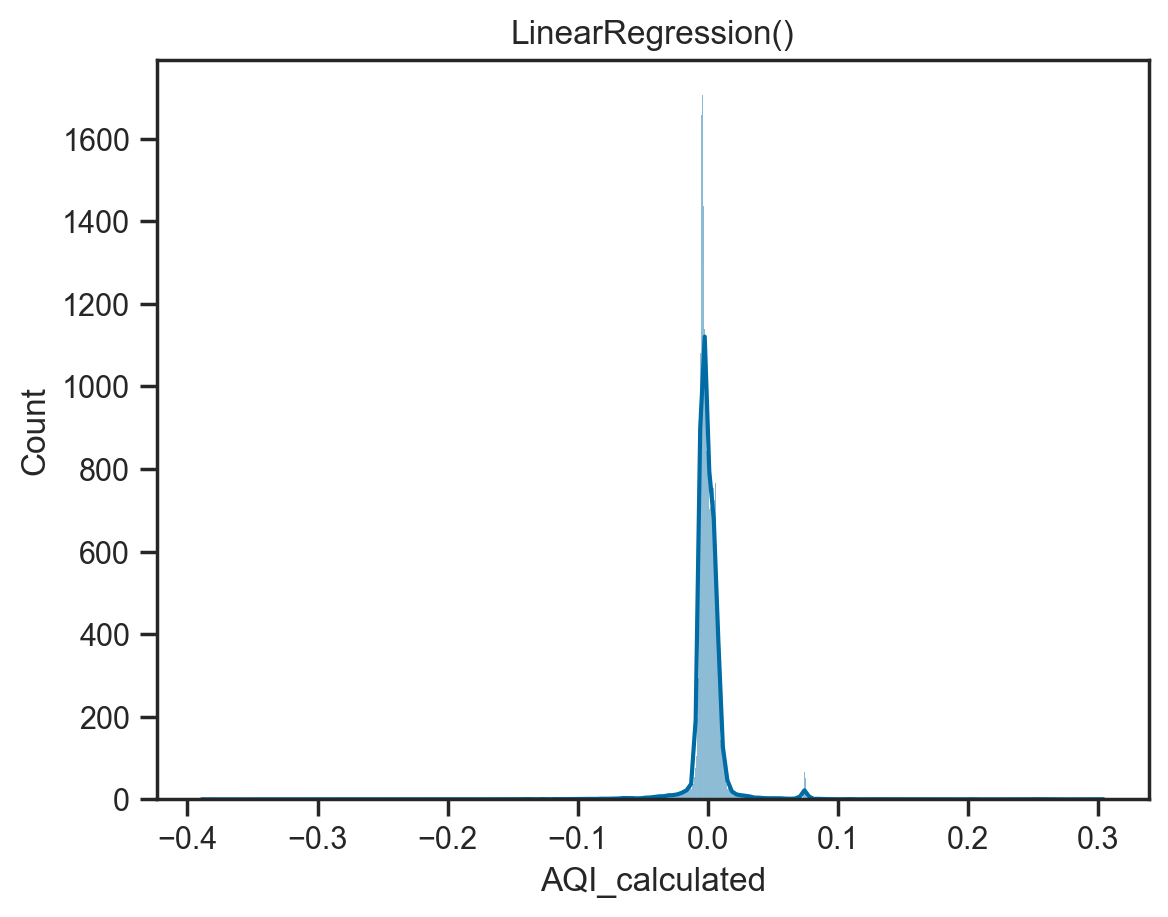

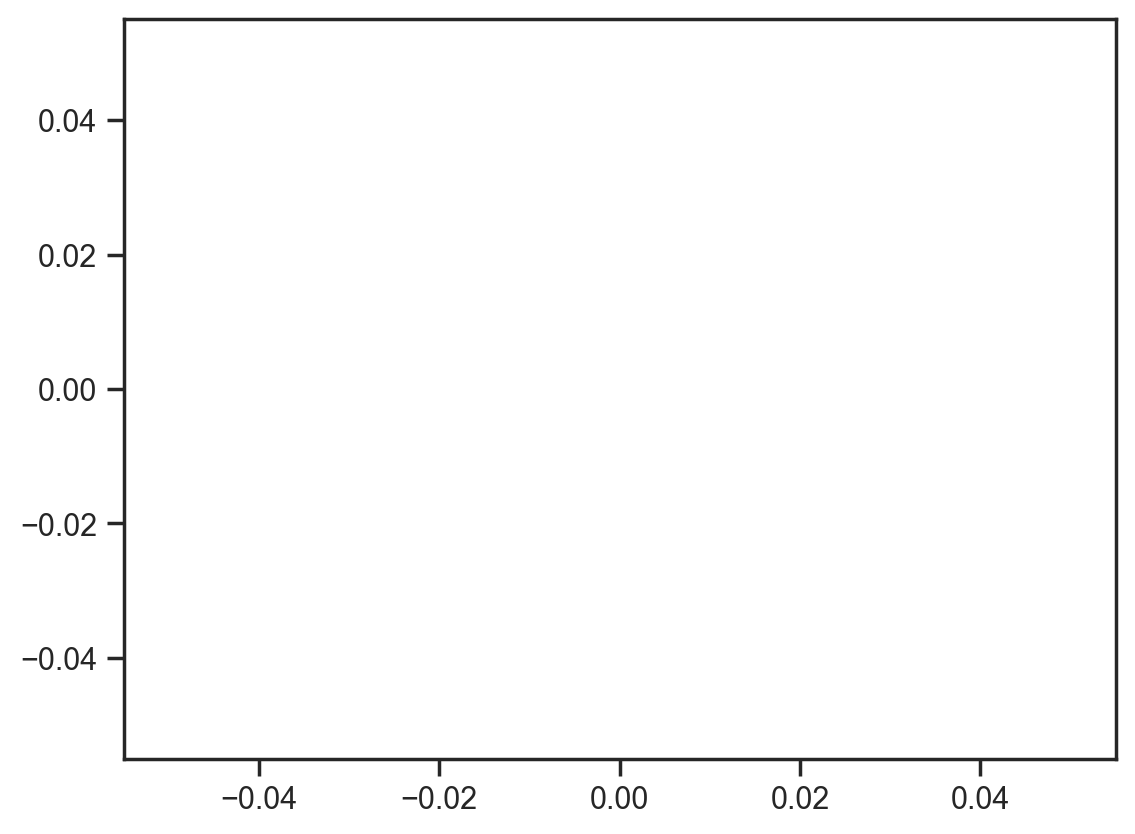

In [323]:
# Before training, standardize/normalize 

X_train, X_test, y_train, y_test = train_test_split(
    df_test_normalized.drop(['AQI_calculated'],axis=1),
                                                    df_test_normalized['AQI_calculated'],
                                                    train_size=0.8)

def helper(model):
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))
    s = cross_val_score(estimator=model,
                        X=X_train,
                        y=y_train,
                        scoring='neg_mean_squared_error',
                        cv=3)
    print("Average cv score ", np.mean(s))
#     print("mean_squared_log_error ",
#           mean_squared_log_error(y_test, y_pred, squared=False))
#     print("mean_squared_error ",
#       mean_squared_error(y_test, y_pred))
    print("r2_score ",
      r2_score(y_test, y_pred))
    
    print()

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()
for i in [lr, tree, rf, ab, br]:
    helper(i)